This is a notebook to parse Caliper results from running CoreNEURON on CPU/GPU into pretty figures for the 2021 NEURON frontiers research paper.

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint

In [2]:
matplotlib.rcdefaults()
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif')
#matplotlib.rcParams['text.latex.preamble'] = []
fig_width = 6.97522 # \textwidth in inches from Overleaf

In [3]:
# Update these if you re-run the benchmarks. They are slurm job IDs.
jobids = []
# Results for the Olfactory Bulb model obtained after the BB5 upgrade and with
# improvements to instrumentation, plus MPI_* function profiling and nwarp 2048
jobids += ["162118","162123","162128","162133","162138","162143","162148","162153","162158","162163","162168","162173","162178","162183","162188","162193","162198","162203","162208","162213","162218","162223","162228","162233","162238","162243","162248","162253","162258","162263","287843","287844","287845","287846","287847","287848","287849","287850","287851","287852","287853","287854","287855","287856","287857","287858","287859","287860","287861","287862","287863","287864","287865","287866","287867","287868","287869","287870","287871","287872","287873","287874","287875","287876","287877","287878","287879","287880","287881","287882","287883","287884","287885","287886","287887","287888","287889","287890","287891","287892","287893","287894","287895","287896","287897","287898","287899","287900","287901","287902","287903","287904","287905","287906","287907","287908","287909","287910","287911","287912","287913","287914","287915","287916","287917","287918","287919","287920","287921","287922","287923","287924","287925","287926","287927","287928","287929","287930","287931","287932","287933","287934","287935","287936","287937","287938","287939","287940","287941","287942","287943","287944","287945","287946","287947","287948","287949","287950","287951","287952","287953","287954","287955","287956","287957","287958","287959","287960","287961","287962"]
# Results for the Hippocampus model obtained after the BB5 upgrade and with
# improvements to instrumentation"," plus MPI_* function profiling and nwarp 2048
jobids += ["165791","165792","165793","165794","165795","165796","165797","165798","165799","165800","165801","165802","165803","165804","165805","165806","165807","165808","165809","165810","165811","165812","165813","165814","165815","165816","165817","165818","165819","165820","165821","165822","165823","165824","165825","165826","165827","165828","165829","165830","165831","165832","165833","165834","165835","165836","165837","165838","165839","165840","165841","165842","165843","165844","165845","165846","165847","165848","165849","165850","165851","165852","165853","165854","165855","165856","165857","165858","165859","165860","165861","165862","165863","165864","165865","165866","165867","165868","165869","165870","165871","165872","165873","165874","165875","165876","165877","165878","165879","165880","165881","165882","165883","165884","165885","165886","165887","165888","165889","165890","165891","165892","165893","165894","165895","165896","165897","165898","165899","165900","165901","165902","165903","165904","165905","165906","165907","165908","165909","165910","165911","165912","165913","165914","165915","165916","165917","165918","165919","165920","165921","165922","165923","165924","165925","165926","165927","165928","165929","165930","165931","165932","165933","165934","165935","165936","165937","165938","165939","165940"]
# Results for NetPyNE M1 circuit obtained after the BB5 upgrade and with
# improvements to instrumentation"," plus MPI_* function profiling and nwarp 2048
# GPU runs are with 16 datasets
jobids += ["159791","159796","159801","159806","159811","159816","159821","159826","159831","159836","159841","159846","159851","159856","159861","159866","159871","159876","159881","159886","159891","159896","159901","159906","159911","159916","159921","159926","159931","159936","233347","233348","233349","233350","233351","233352","233353","233354","233355","233356","233357","233358","233359","233360","233361","233362","233363","233364","233365","233366","233367","233368","233369","233370","233371","233372","233373","233374","233375","233376","233377","233378","233379","233380","233381","233382","233383","233384","233385","233386","233387","233388","233389","233390","233391","233392","233393","233394","233395","233396","233397","233398","233399","233400","233401","233402","233403","233404","233405","233406","233407","233408","233409","233410","233411","233412","233413","233414","233415","233416","233417","233418","233419","233420","233421","233422","233423","233424","233425","233426"]
# Results for the M1 model from GCP
jobids += ["19","20","21","22","23","24","25","26","27","28","29","33","34","35","36","37","38","39","40","41","310122-153919","310122-154326","310122-154842","310122-155140","310122-155608","310122-160019","310122-160539","310122-160835","310122-161305","310122-161712","310122-162225","310122-162520","310122-162943","310122-163352","310122-163910","310122-164206","310122-164637","310122-165044","310122-165558","310122-165855","310122-170320","310122-170730","310122-171249","310122-171545","310122-172015","310122-172422","310122-172936","310122-173231","310122-173655","310122-174105","310122-174624","310122-174919","310122-175349","310122-175756","310122-180309","310122-180606","310122-181030","310122-181440","310122-181958","310122-182253","310122-182722","310122-183129","310122-183642","310122-183937","310122-184400","310122-184810","310122-185328","310122-185623","310122-190051","310122-190458","310122-191010","310122-191305","310122-191729","310122-192139","310122-192657","310122-192952","310122-193421","310122-193828","310122-194342","310122-194638","310122-195102","310122-195511","310122-200029","310122-200324","310122-200753","310122-201200","310122-201713","310122-202007","310122-202432","310122-202842","310122-203358","310122-203653","310122-204120","310122-204526","310122-205039","310122-205332","310122-205754","310122-210204","310122-210723","310122-211018"]

In [4]:
# For some reason it's "hard" to get the path of the .ipynb file, so just hardcode it for now.
repo_prefix = os.environ.get("PLOTTING_REPO_PREFIX", ".")
# Load the Caliper result files into memory.
all_data = {}
number_of_runs = 10
for jobid in jobids:
    with open('{}/data/caliper-{}.json'.format(repo_prefix, jobid), 'r') as cfile:
        job_data = json.load(cfile)
    # Turn Caliper's list-of-dicts into a dict
    data_entries = len(job_data['data'])
    job_data['data'] = {x.pop('path', None): x for x in job_data['data']}
    # Check we didn't accidentally drop anything due to a name collision
    assert len(job_data['data']) == data_entries
    # Figure out a "short" key for the results that includes whatever detail we're interested in.
    # e.g. if we were to load the olfactory bulb results at the same time, we might want to put
    #      `hip` and/or `obulb` into the key.    
    backend = job_data['backend']
    model = {
        "neurodamus-hippocampus/1.5.0.20211008-3.3.2": 'hippocampus',
        "olfactory-bulb-3d/0.1.20211014": 'olfactory-bulb-3d',
        "netpyne-m-one/0.1-20211206": 'netpyne-m1',
        "netpyne-m-one/0.1-20211206-gcp": 'netpyne-m1-gcp'
    }[job_data['neurodamus_version']]
    arch = backend[0:3]
    assert arch in {'cpu', 'gpu'}
    if arch == 'gpu':
        if "GCP" in job_data:
            num_gpus = int(job_data['gpus_per_node'])
        else:
            num_gpus = int(job_data['gpus_per_node'])*int(job_data['env']['SLURM_NNODES'])
        #num_gpus = len(job_data['env']['SLURM_JOB_GPUS'].split(','))*int(job_data['env']['SLURM_NNODES'])  # Old way to calculate number of GPUs. Doesn't work after SLURM update
        arch += '-{}gpus'.format(num_gpus)
        if int(job_data['env'].get('NVCOMPILER_ACC_SYNCHRONOUS', '0')):
            arch += '-accsync'
            job_data['backend'] = job_data['backend'].replace('-synchronous', '')
        job_data['backend'] = job_data['backend'].replace('-asynchronous', '')
    translator = 'mod2c' if len(job_data['backend']) == 3 else job_data['backend'][4:]
    if (model, arch, translator) in all_data:
        # print("Processing {}".format((model, arch, translator)))
        # print(all_data[(model, arch, translator)]['data'].keys())
        for key in all_data[(model, arch, translator)]['data'].keys():
            # print(all_data[(model, arch, translator)]['data'][key].keys())
            # print("printed")
            # print("key: {}".format(key))
            if key is not None:
                # print(all_data[(model, arch, translator)]['data'][key].keys())
                for timing_key in all_data[(model, arch, translator)]['data'][key].keys():
                    # print("timing_key: {}".format(timing_key))
                    if type(all_data[(model, arch, translator)]['data'][key][timing_key]) is not list:
                        all_data[(model, arch, translator)]['data'][key][timing_key] = [all_data[(model, arch, translator)]['data'][key][timing_key]]
                    all_data[(model, arch, translator)]['data'][key][timing_key] += [job_data['data'][key][timing_key]]
                    # print(all_data[(model, arch, translator)]['data'][key][timing_key])
                    assert len(all_data[(model, arch, translator)]['data'][key][timing_key]) <= number_of_runs
    else:
        print("Added {}".format((model, arch, translator)))
        all_data[(model, arch, translator)] = job_data
    # for key in job_data['data'].keys():
    #     print(key)
    #     print(job_data['data'][key])
    #     for timing_key in job_data['data'][key].keys():
    #         print(timing_key)
    #         print(job_data['data'][key][timing_key])
for job in all_data:
    # print(all_data[job]['data'].keys())
    print(job)
    for key in all_data[job]['data'].keys():
        # key_check = key == "main/simulation" or key == "main/simulation/timestep/spike-exchange" or key == "main/simulation/timestep/deliver-events"
        # key_check = key == "main/simulation" or key == "main/simulation/timestep/state-update"
        key_check = key == "main/simulation/timestep/spike-exchange/spike-exchange/imbalance" or key == "main/simulation/timestep/spike-exchange"
        if key_check:
            print(key)
        for timing_key in all_data[job]['data'][key].keys():
            timing_key_check = timing_key == "inclusive_time_rank_avg" or timing_key == "inclusive_time_rank_max"
            if key_check and timing_key_check:
            # if timing_key == "inclusive_time_rank_avg":
                print(timing_key)
                print(all_data[job]['data'][key][timing_key])
            all_data[job]['data'][key][timing_key] = np.mean(all_data[job]['data'][key][timing_key])
            if key_check and timing_key_check:
            # if timing_key == "inclusive_time_rank_avg":
                print("Mean: {}".format(all_data[job]['data'][key][timing_key]))
for job in all_data:
    if job[0] == "hippocampus":
        new_key_data = all_data[job]["data"].copy()
        for key in all_data[job]["data"].keys():
            hippocampus_spike_exchange_prefix = 'main/simulation/spike-exchange'
            if key is not None and key.startswith(hippocampus_spike_exchange_prefix):
                old_name = key
                new_name = 'main/simulation/timestep/spike-exchange' + key[len(hippocampus_spike_exchange_prefix):]
                spike_exchange_data = new_key_data.pop(old_name)
                new_key_data[new_name] = spike_exchange_data
                # Need to update the inclusive time of main/simulation/timestep, otherwise it will be smaller than the sum of its children.
                if old_name == hippocampus_spike_exchange_prefix:
                    new_key_data['main/simulation/timestep']['inclusive_time_rank_avg'] += spike_exchange_data['inclusive_time_rank_avg']
        all_data[job]["data"] = new_key_data
pprint(sorted(all_data.keys()))



Added ('olfactory-bulb-3d', 'cpu', 'mod2c')
Added ('olfactory-bulb-3d', 'cpu', 'nmodl-sympy')
Added ('olfactory-bulb-3d', 'cpu', 'nmodl')
Added ('olfactory-bulb-3d', 'gpu-4gpus', 'mod2c')
Added ('olfactory-bulb-3d', 'gpu-4gpus-accsync', 'mod2c')
Added ('olfactory-bulb-3d', 'gpu-8gpus', 'mod2c')
Added ('olfactory-bulb-3d', 'gpu-8gpus-accsync', 'mod2c')
Added ('olfactory-bulb-3d', 'gpu-4gpus', 'nmodl-sympy')
Added ('olfactory-bulb-3d', 'gpu-4gpus-accsync', 'nmodl-sympy')
Added ('olfactory-bulb-3d', 'gpu-8gpus', 'nmodl-sympy')
Added ('olfactory-bulb-3d', 'gpu-8gpus-accsync', 'nmodl-sympy')
Added ('olfactory-bulb-3d', 'gpu-4gpus', 'nmodl')
Added ('olfactory-bulb-3d', 'gpu-4gpus-accsync', 'nmodl')
Added ('olfactory-bulb-3d', 'gpu-8gpus', 'nmodl')
Added ('olfactory-bulb-3d', 'gpu-8gpus-accsync', 'nmodl')
Added ('hippocampus', 'cpu', 'nmodl-sympy')
Added ('hippocampus', 'gpu-4gpus', 'nmodl-sympy')
Added ('hippocampus', 'gpu-4gpus-accsync', 'nmodl-sympy')
Added ('hippocampus', 'gpu-8gpus', 'nm

('hippocampus', 'cpu', 'mod2c')
('hippocampus', 'gpu-4gpus', 'mod2c')
('hippocampus', 'gpu-4gpus-accsync', 'mod2c')
('hippocampus', 'gpu-8gpus', 'mod2c')
('hippocampus', 'gpu-8gpus-accsync', 'mod2c')
('hippocampus', 'cpu', 'nmodl')
('hippocampus', 'gpu-4gpus', 'nmodl')
('hippocampus', 'gpu-4gpus-accsync', 'nmodl')
('hippocampus', 'gpu-8gpus', 'nmodl')
('hippocampus', 'gpu-8gpus-accsync', 'nmodl')
('netpyne-m1', 'cpu', 'mod2c')
('netpyne-m1', 'cpu', 'nmodl-sympy')
('netpyne-m1', 'cpu', 'nmodl')
('netpyne-m1', 'gpu-4gpus', 'mod2c')
('netpyne-m1', 'gpu-4gpus-accsync', 'mod2c')
('netpyne-m1', 'gpu-8gpus', 'mod2c')
('netpyne-m1', 'gpu-8gpus-accsync', 'mod2c')
('netpyne-m1', 'gpu-4gpus', 'nmodl-sympy')
('netpyne-m1', 'gpu-4gpus-accsync', 'nmodl-sympy')
('netpyne-m1', 'gpu-8gpus', 'nmodl-sympy')
('netpyne-m1', 'gpu-8gpus-accsync', 'nmodl-sympy')
('netpyne-m1-gcp', 'cpu', 'nmodl-sympy')
('netpyne-m1-gcp', 'cpu', 'mod2c')
('netpyne-m1-gcp', 'gpu-4gpus', 'nmodl-sympy')
('netpyne-m1-gcp', 'gpu-4g

In [140]:
def grouped_bars(axes, values, group_labels, group_sublabels, width=0.2, sep=0.05, xtick_rotation=0, labels=None):
    r"""Make a bar chart containing several groups of bars.

    This helps to create matplotlib bar charts that look like:
   
                       | = X
       }               } = Y
      |}               ] = Z
      |}     [   |        
      |}   |}[   |}[   |}  |
      ----------------------
      A     B     C     D  E
      
    Parameters
    ----------
    axes : Axes
        Axes on which to draw the figure.
    values : (N, M) ndarray
        values[i][j] is the height of the i-th bar in the j-th group.
        Non-finite values are ignored.
    group_labels : array_like
        String labels for the groups of bars. This would be [A, B, C, D, E] for
        the example above. Length should match `M`.
    group_sublabels : array_like
        String labels for the members of each group, shown in the legend. This
        would be [X, Y, Z] for the example above.
        Length should match `N`.
    width : float, optional
        Width of each bar, in units where the centres of groups are separated
        by one unit.
    sep : float, optional
        Gap between bars within the same group, in the same units as `width`.
    xtick_rotation : float, optional
        Amount by which to rotate the labels given in `group_labels`.
    labels : str, optional
        Annotate each bar with a label of its value (from `values`) formatted
        using the format string `labels`.
    """
    max_group_mult, num_groups = values.shape
    assert len(group_labels) == num_groups
    assert len(group_sublabels) == max_group_mult
    cmap = plt.get_cmap('Set3') # 'tab10' 'Paired' also works OK
    # Handle all the i_bar-th bars from each group
    for i_bar in range(max_group_mult):
        xvs, yvs = [], []
        for j_grp in range(num_groups):
            # How many non-None values are there in this group?
            grp_size = sum([1 for i in range(max_group_mult) if np.isfinite(values[i,j_grp])])
            # Total width of all bars+separators in this group
            grp_width = (grp_size-1)*sep + grp_size*width
            xvs.append(j_grp - 0.5*grp_width + 0.5*width + i_bar*(width + sep))
            yvs.append(values[i_bar,j_grp])
        b = axes.bar(xvs, yvs, width=width, label=group_sublabels[i_bar], color=cmap.colors[(i_bar+4)%len(cmap.colors)])
        if labels is not None:
            axes.bar_label(b, fmt=labels, padding=2, fontsize=7)
    axes.set_xticks(range(num_groups))
    axes.set_xticklabels(group_labels, rotation=xtick_rotation, ha='center')

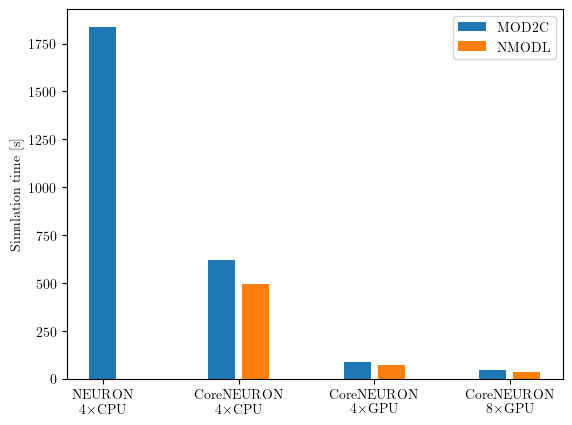

In [6]:
# Make a chart showing the overall time. Left to right we want to show:
overall_timing_keys = [
    # Hippocampus model, Average of SLURM jobs: 165261,165262,165263,165264,165265,165266,165267,165268,165269,165270
    # Olfactory bulb model, Average of SLURM jobs: 2933462,162274,162275,162276,162277,162278,162279,162280,162281,162282
    # Netpyne M1 model on BB5, Average of SLURM jobs: 165250,165251,165252,165253,165254,165255,165256,165257,165258,165259
    # Netpyne M1 model on GCP, Average calculated in NetPyNE_M1_CPU_NEURON.csv
    ('NEURON\n4$\\times$CPU', {'hippocampus': 1837.54839,
                               'olfactory-bulb-3d': 1842.5,
                               'netpyne-m1': 4925.654,
                               'netpyne-m1-gcp': 4774.208}),
    # <description to print on plot>, <arch>
    # where the key in `all_data` will be (<model>, <arch>, <translator>)
    ('CoreNEURON\n4$\\times$CPU', 'cpu'),
    ('CoreNEURON\n4$\\times$GPU', 'gpu-4gpus'),
    ('CoreNEURON\n8$\\times$GPU', 'gpu-8gpus'),
]
overall_timing_translators = [
    # <description to print on plot>, <translator for use in `all_data` key
    ('MOD2C', 'mod2c'),
    #('NMODL', 'nmodl'),
    ('NMODL', 'nmodl-sympy'),
]

def make_overall_timing_plot(model, axes=None, speedup=False, y_lim=None, axes_title=None, **kwargs):
    if axes is None:
        fig, axes = plt.subplots()
    group_labels = [x[0] for x in overall_timing_keys]
    group_sublabels = [x[0] for x in overall_timing_translators]
    simulation_runtimes = np.full((len(overall_timing_translators), len(overall_timing_keys)), np.nan)
    for n, (title, arch) in enumerate(overall_timing_keys):
        if type(arch) == dict:
            # Temporary hack for NEURON value that doesn't come from Caliper JSON
            simulation_runtimes[0,n] = arch[model]
        else:
            for n_translator, (translator_title, translator) in enumerate(overall_timing_translators):
                total_time = all_data[(model, arch, translator)]['data']['main/simulation']
                simulation_runtimes[n_translator,n] = total_time['inclusive_time_rank_avg']
    
    if speedup:
        # Convert to speedup w.r.t. NEURON
        speedups_wrt_neuron = simulation_runtimes[0,0] / simulation_runtimes
        # Don't show NEURON because it's 1 by definition
        data_to_plot = speedups_wrt_neuron[:,1:]
        print("data_to_plot")
        print(data_to_plot)
        group_labels = [x.split('\n')[1] for x in group_labels[1:]]
        #if model == 'olfactory-bulb-3d':
        #    bar_labels = '%.1fx'
        #else:
        bar_labels = '%.1fx'
    else:
        data_to_plot = simulation_runtimes
        bar_labels = None
        
    grouped_bars(axes, data_to_plot, group_labels, group_sublabels,
                 xtick_rotation=0 if speedup else 0, labels=bar_labels, **kwargs)

    if speedup:
        axes.set_ylabel(r'Speedup [$\times$ NEURON]')
        if y_lim is None:
            factor = 25
            # round up to the nearest `factor`
            axes.set_ylim(0, np.ceil(data_to_plot.max()/factor)*factor)
        else:
            axes.set_ylim(0, y_lim)
    else:
        if y_lim is not None:
            axes.set_ylim(0, y_lim)
        axes.set_ylabel('Simulation time [s]')
    axes.legend(title=axes_title, loc='upper left' if speedup else 'upper right')
    
make_overall_timing_plot('hippocampus')
plt.savefig(os.path.join(repo_prefix, 'hippocampus-simulation-time.pdf'), bbox_inches='tight')

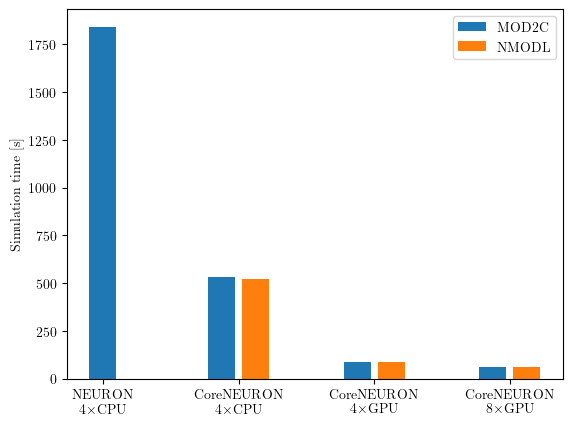

In [7]:
make_overall_timing_plot('olfactory-bulb-3d')
plt.savefig(os.path.join(repo_prefix, 'olfactory-bulb-3d-simulation-time.pdf'), bbox_inches='tight')

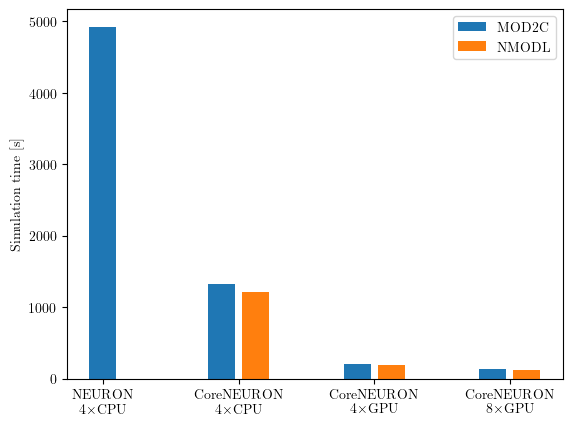

In [8]:
make_overall_timing_plot('netpyne-m1')
plt.savefig(os.path.join(repo_prefix, 'netpyne-m1-simulation-time.pdf'), bbox_inches='tight')

data_to_plot
[[ 2.9607376  20.93751992 41.77871533]
 [ 3.69690968 26.06544613 51.9731668 ]]


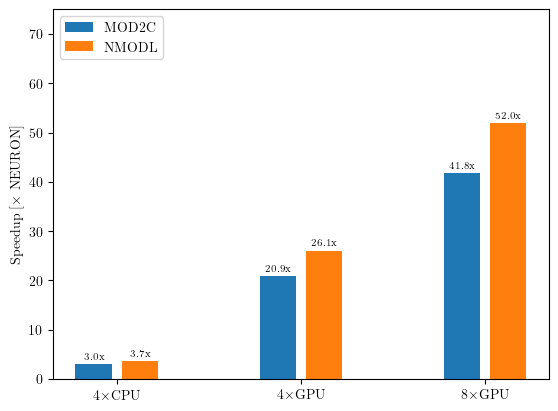

In [9]:
make_overall_timing_plot('hippocampus', speedup=True)
plt.savefig(os.path.join(repo_prefix, 'hippocampus-simulation-speedup.pdf'), bbox_inches='tight')

data_to_plot
[[ 3.47209919 21.40746504 30.36915617]
 [ 3.54405252 21.23664248 29.95734299]]


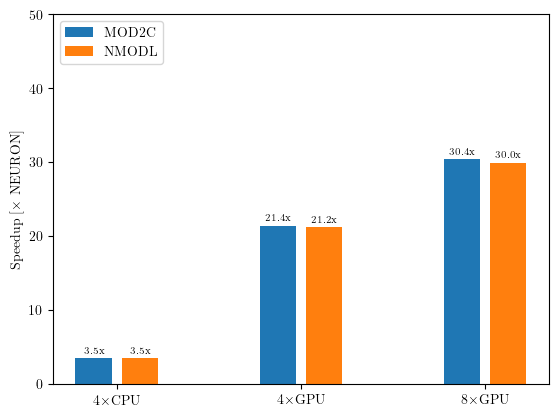

In [10]:
make_overall_timing_plot('olfactory-bulb-3d', speedup=True)
plt.savefig(os.path.join(repo_prefix, 'olfactory-bulb-3d-simulation-speedup.pdf'), bbox_inches='tight')

data_to_plot
[[ 3.7089052  24.46992747 37.03630488]
 [ 4.04839654 26.33725172 39.18717737]]


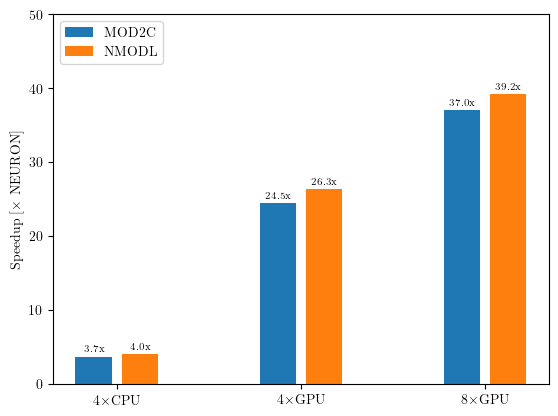

In [11]:
make_overall_timing_plot('netpyne-m1', speedup=True)
plt.savefig(os.path.join(repo_prefix, 'netpyne-m1-simulation-speedup.pdf'), bbox_inches='tight')

data_to_plot
[[ 3.42324219 20.47263034 30.24806988]
 [ 3.64151082 20.75771786 30.21736138]]


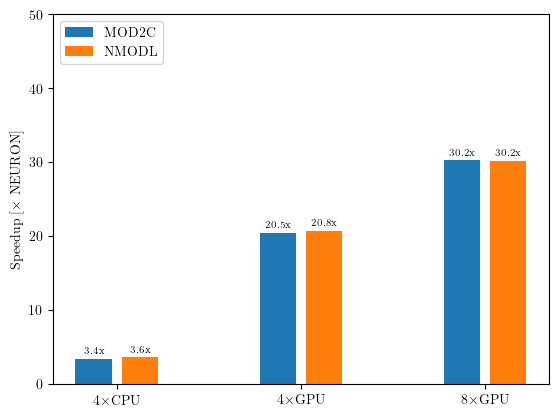

In [12]:
make_overall_timing_plot('netpyne-m1-gcp', speedup=True)
plt.savefig(os.path.join(repo_prefix, 'netpyne-m1-gcp-simulation-speedup.pdf'), bbox_inches='tight')

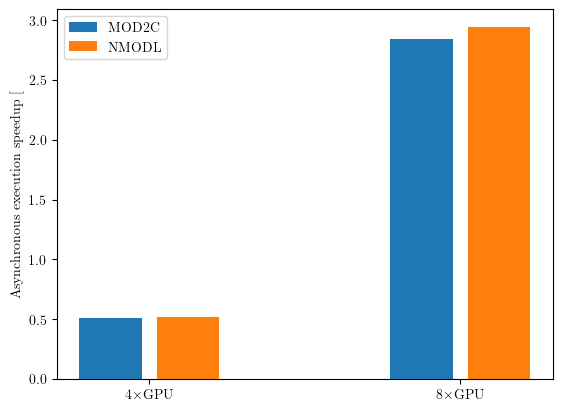

In [13]:
# Make a plot showing how much NVCOMPILER_ACC_SYNCHRONOUS matters (or not)
def make_async_speedup_plot(model):
    sync_data = {}
    for sync in [True, False]:
        sync_str = '-accsync' if sync else ''
        async_keys = [
            ('4$\\times$GPU', 'gpu-4gpus' + sync_str),
            ('8$\\times$GPU', 'gpu-8gpus' + sync_str),
        ]
        sync_group_labels = [x[0] for x in async_keys]
        group_sublabels = [x[0] for x in overall_timing_translators]
        simulation_runtimes = np.full((len(overall_timing_translators), len(async_keys)), np.nan)
        for n, (title, arch) in enumerate(async_keys):
            for n_translator, (translator_title, translator) in enumerate(overall_timing_translators):
                total_time = all_data[(model, arch, translator)]['data']['main/simulation']
                value = total_time['inclusive_time_rank_avg']
                simulation_runtimes[n_translator,n] = value
        sync_data[sync] = simulation_runtimes
    async_speedup = 100*(sync_data[True] / sync_data[False] - 1)
    fig, ax = plt.subplots()
    grouped_bars(ax, async_speedup, sync_group_labels, group_sublabels, xtick_rotation=0)
    plt.ylabel('Asynchronous execution speedup [%]')
    plt.legend()
    plt.savefig(os.path.join(repo_prefix, model + '-simulation-async-gpu-speedup.pdf'), bbox_inches='tight')
    
make_async_speedup_plot('hippocampus')

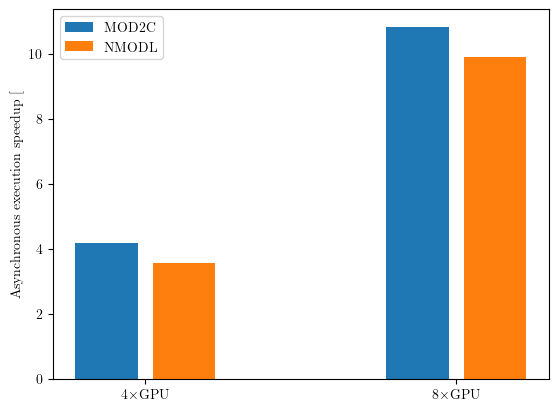

In [14]:
make_async_speedup_plot('olfactory-bulb-3d')

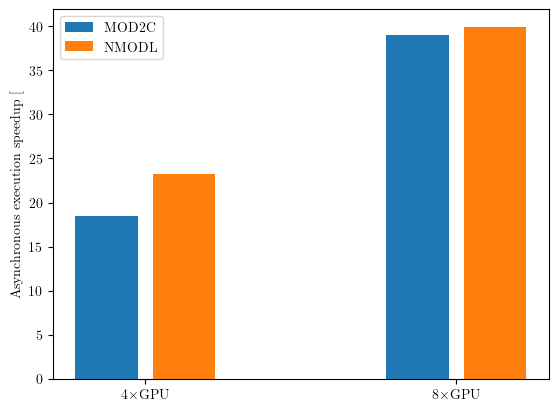

In [15]:
make_async_speedup_plot('netpyne-m1')

Now make some plots of the different components of the simulation runtime.

In [16]:
def survey(axes, results, category_names, legend_axes=None):
    """
    Parameters
    ----------
    axes : Axes
        Axes to plot on.
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = [str(k) for k in results.keys()]#list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    cmap = plt.get_cmap('tab10')#Paired')
    axes.invert_yaxis()
    axes.xaxis.set_visible(False)
    axes.set_xlim(0, 1)

    for i, colname in enumerate(category_names):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = axes.barh(labels, widths, left=starts, height=0.5,
                          label=colname, color=cmap.colors[i%len(cmap.colors)])
    if legend_axes is None:
        axes.legend(ncol=min(6, len(category_names)), bbox_to_anchor=(0, 0),
                    loc='upper left', fontsize='small')
    else:
        h,l = axes.get_legend_handles_labels()
        legend_axes.legend(h,l, borderaxespad=0, ncol=2, loc='upper left', fontsize='small', frameon=False)
        legend_axes.axis("off")

In [128]:
# Make a chart showing the overall time. Left to right we want to show:
breakdown_keys = [
    ('CoreNEURON\n4 $\\times$ Cascade Lake', 'cpu'),
#    ('CoreNEURON\n4 $\\times$ V100 GPUs', 'gpu-4gpus-accsync'),
    ('CoreNEURON\n8 $\\times$ V100 GPUs', 'gpu-8gpus-accsync'),
]

breakdown_translators = [
   ('MOD2C', 'mod2c'),
#    ('NMODL', 'nmodl'),
   ('NMODL', 'nmodl-sympy'),
]

known_sort_orders = {
    ('main/simulation/timestep/deliver-events', 'main/simulation/timestep/matrix-solver', 'main/simulation/timestep/second-order-cur', 'main/simulation/timestep/setup-tree-matrix', 'main/simulation/timestep/state-update', 'main/simulation/timestep/update', 'main/simulation/timestep/spike-exchange', 'main/simulation/spike-exchange'):
    ('main/simulation/timestep/deliver-events', 'main/simulation/timestep/setup-tree-matrix', 'main/simulation/timestep/matrix-solver', 'main/simulation/timestep/second-order-cur', 'main/simulation/timestep/update', 'main/simulation/timestep/state-update', 'main/simulation/timestep/spike-exchange', 'main/simulation/spike-exchange')
}

pretty_latex = {
    'mod2c': 'MOD2C',
    'nmodl-sympy': 'NMODL',
    'cpu': '4$\\times$CPU',
    'gpu-8gpus-accsync': '8$\\times$GPU',
    ('cpu', 'mod2c'): '4$\\times$CPU, MOD2C',
    ('cpu', 'nmodl'): '4$\\times$CPU, NMODL',
    ('cpu', 'nmodl-sympy'): '4$\\times$CPU, NMODL',
    ('gpu-4gpus-accsync', 'mod2c'): '4$\\times$GPU, MOD2C',
    ('gpu-8gpus-accsync', 'mod2c'): '8$\\times$GPU, MOD2C',
    ('gpu-4gpus-accsync', 'nmodl'): '4$\\times$GPU, NMODL',
    ('gpu-8gpus-accsync', 'nmodl'): '8$\\times$GPU, NMODL',
    ('gpu-4gpus-accsync', 'nmodl-sympy'): '4$\\times$GPU, NMODL',
    ('gpu-8gpus-accsync', 'nmodl-sympy'): '8$\\times$GPU, NMODL',
    'setup-tree-matrix': 'Current calculation',
    'matrix-solver': 'Matrix solver',
    'second-order-cur': '2nd order current',
    'update': 'Voltage update',
    'state-update': 'State update',
    'leftovers': 'Other',
    'deliver-events': 'Event delivery\n(inc. CPU/GPU transfers)',
    'spike-exchange': 'Spike exchange',
    'gap-v-transfer': 'Gap Junction\nvoltage update'
}

# Extract the (immediate) children of a particular prefix
def get_components_from_prefix(model, prefix, assume_zero=False, threshold=0, translators=None):
    """
    prefix: string giving the part of the application that is to be analysed
    assume_zero: if False, require all benchmark runs had the same children, if True, assume zero time for missing children
    threshold: hide contributions that contribute less than this fraction in all benchmarks
    
    e.g. if we have
    P
    P/A
    P/B
    P/B/1
    P/B/2
    P/C
    Q
    R
    
    then prefix=P will extract P/A, P/B and P/C
    """
    # Make sure the trailing / is there
    if prefix[-1] != '/': prefix += '/'
    # Get the union of all the children of `prefix` seen across the different benchmark runs.
    # Preserve order, consider it an error if the order is inconsistent across benchmark runs.
    entries = []
    for title, arch in breakdown_keys:
        for translator_title, translator in breakdown_translators:
            key_data = all_data[(model, arch, translator)]['data']
            local_entries = tuple(sorted([x for x in key_data.keys()
                                          if x is not None
                                          and x.startswith(prefix)
                                          and x.count('/', len(prefix)) == 0]))
            local_entries = known_sort_orders.get(local_entries, local_entries)
            if len(entries) == 0:
                entries = local_entries
            elif entries != local_entries:
                s1, s2 = set(entries), set(local_entries)
                if s1 == s2:
                    print("Ignoring differing order of entries")
                elif len(s1 - s2):
                    print("Ignoring {} missing in {} (ordering not checked!)".format(s1 - s2, (arch, translator)))
                else:
                    # Not implemented
                    assert False
    output_data = {}
    for n, (title, arch) in enumerate(breakdown_keys):
        for n_translator, (translator_title, translator) in enumerate(breakdown_translators):
            if translators is not None and not translator in translators: continue
            key = (model, arch, translator)
            key_data = all_data[key]['data']
            def get(entry):
                if entry in key_data:
                    return key_data[entry]['inclusive_time_rank_avg']
                elif assume_zero:
                    return 0.0
                raise Exception("{} has no value for {}".format(key, entry))                    
            # Normalise values to the time recorded for the prefix
            values = [get(k)/get(prefix[:-1]) for k in entries]
            output_data[(arch, translator)] = values
    # See if the threshold removes anything
    to_cull = []
    for i in range(len(entries)):
        if all(v[i] < threshold for v in output_data.values()):
            to_cull.append(i)
    to_cull.reverse()
    entries = list(entries)
    for i in to_cull:
        # remove the i-th values and the i-th title from `entries`
        print("Suppressing", entries.pop(i))
        for v in output_data.values():
            v.pop(i)
    # Remove the explicitly specified prefix
    value_names = [k[len(prefix):] for k in entries]
    # See if we can find another common `foobar-` prefix to remove
    ind = value_names[0].find('-')
    if ind != -1:
        extra_prefix = value_names[0][:ind+1]
        if all([k.startswith(extra_prefix) for k in value_names]):
            value_names = [k[len(extra_prefix):] for k in value_names]
            prefix += extra_prefix       
    # Add an explicit entry for "leftovers" instead of leaving a white void
    value_names.append('leftovers')
    for v in output_data.values():
        v.append(1.0 - sum(v))
        print('leftover', v[-1])
    return value_names, output_data, prefix

def make_plot(model, prefix, axes=None, latexify=True, legend_axes=None, **kwargs):
    save_figure = False
    if axes is None:
        fix, axes = plt.subplots()
        save_figure = True
    plot_kwargs = {x: kwargs.pop(x) for x in ['title'] if x in kwargs}
    value_names, values, prefix = get_components_from_prefix(model, prefix, **kwargs)

    # Relies on modern Python's order-preserving dicts
    values = {k: values[k] for k in sorted(values.keys(), reverse=True)}
        
    # Helper to allow substitution of pretty LaTeX
    def latex(x):
        return pretty_latex.get(x, str(x)) if latexify else str(x)
    
    # Beautify the different categories (i.e. the names in the legend)
    value_names = [latex(x) for x in value_names]
    
    # Try and de-duplicate the configuration names a bit.
    # If the keys are [(A, X...), (A, Y...), (B, Z...)] then remove the first
    # elements and put a second y-axis on the RHS with only [A, B] and remove
    # the first elements from the LHS.
    if all([type(x) == tuple for x in values.keys()]):
        right_labels = [latex(x[0]) for x in values.keys()]
        left_labels  = [latex(x[1:] if len(x) > 2 else x[1]) for x in values.keys()]
    else:
        left_labels = [latex(x) for x in values.keys()]
        right_labels = None
    
    cmap = plt.get_cmap('tab10') # 'Paired' also works OK
    
    data = np.array(list(values.values()))
    data_cum = data.cumsum(axis=1)
    
    y_pos = np.arange(len(left_labels))
    for i, colname in enumerate(value_names):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = axes.barh(y_pos, widths, left=starts, height=0.5,
                          label=colname, color=cmap.colors[i%len(cmap.colors)])
    if len(set(left_labels)) > 1:
        axes.set_yticks(y_pos)
        axes.set_yticklabels(left_labels)
    else:
        axes.set_yticks([])
    axes.xaxis.set_visible(False)
    axes.set_xlim(0, 1)

    # De-duplicate the RHS labels and compute average y positions for the
    # duplicate elements.
    rhs_axes = axes.twinx()
    rhs_axes.set_ylim(axes.get_ylim())
    last_count, rhs_positions, rhs_labels = 0, [], []
    for i, label in enumerate(right_labels):
        if len(rhs_labels) and label == rhs_labels[-1]:
            last_count += 1
            rhs_positions[-1] += i
        else:
            if len(rhs_labels):
                rhs_positions[-1] /= last_count
            last_count = 1
            rhs_positions.append(i)
            rhs_labels.append(label)
    rhs_positions[-1] /= last_count
    rhs_axes.set_yticks(rhs_positions)
    rhs_axes.set_yticklabels(rhs_labels)
    rhs_axes.yaxis.set_tick_params(length=0) 

    if legend_axes is None:
        axes.legend(ncol=min(6, len(value_names)), bbox_to_anchor=(0, 0),
                    loc='upper left', fontsize='small')
    else:
        h,l = axes.get_legend_handles_labels()
        legend_axes.legend(h,l, borderaxespad=0, ncol=2, loc='upper left', fontsize='small', frameon=False)
        legend_axes.axis("off")        
        
    if save_figure:
        filename = model + '-' + prefix[5:].replace('/', '-')
        if filename[-1] == '-': filename = filename[:-1]
        filename += '.pdf'
        plt.savefig(os.path.join(repo_prefix, filename), bbox_inches='tight')

Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.010313771277681294
leftover 0.03192226238867857


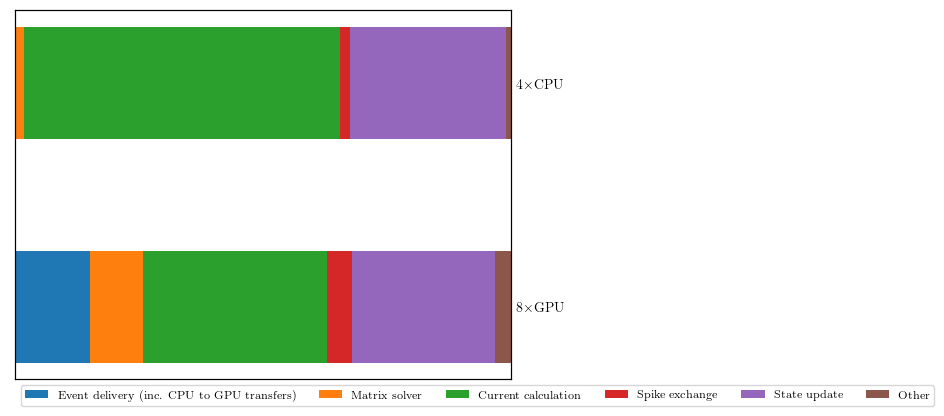

In [17]:
make_plot('hippocampus', 'main/simulation/timestep', threshold=5e-2, translators={'nmodl-sympy'})

Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.0318056175668302
leftover 0.03041255364831108


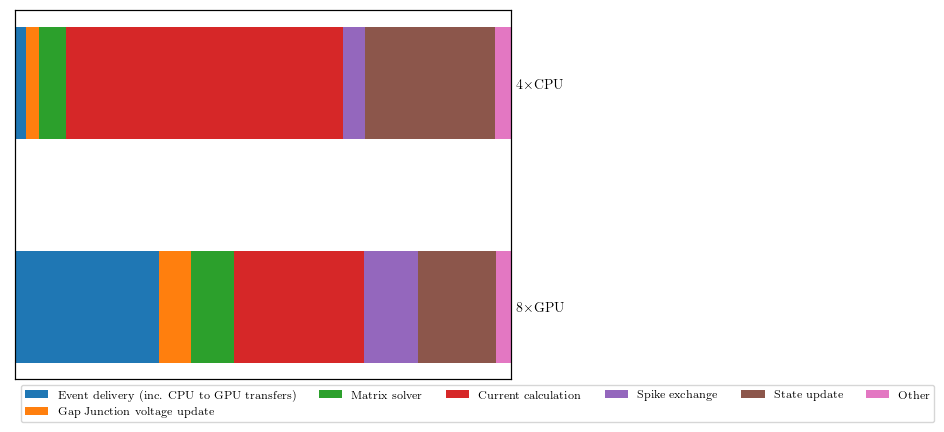

In [18]:
make_plot('olfactory-bulb-3d', 'main/simulation/timestep', threshold=3e-2, translators={'nmodl-sympy'})

Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.004700893459989253
leftover 0.005165585587704746
leftover 0.016361073678169635
leftover 0.017387946655105457


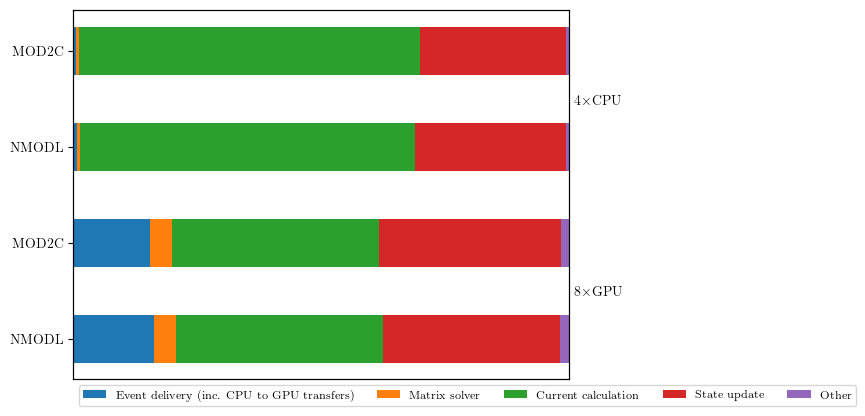

In [19]:
make_plot('netpyne-m1', 'main/simulation/timestep', threshold=3e-2)

Ignoring {'main/simulation/timestep/state-update/state-pas'} missing in ('cpu', 'nmodl-sympy') (ordering not checked!)
Ignoring {'main/simulation/timestep/state-update/state-pas'} missing in ('gpu-8gpus-accsync', 'nmodl-sympy') (ordering not checked!)
Suppressing main/simulation/timestep/state-update/state-pas
leftover 0.003659229794132801
leftover 0.007695879381855675
leftover 0.007100646026176438
leftover 0.011081420157172506


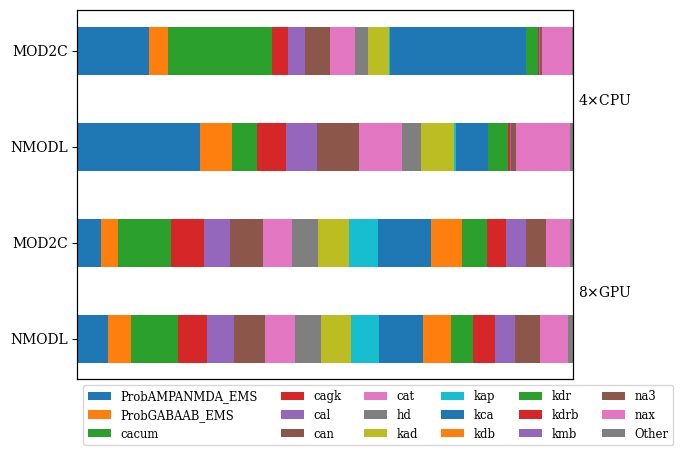

In [20]:
matplotlib.rc('text', usetex=False)
make_plot('hippocampus', 'main/simulation/timestep/state-update', assume_zero=True, threshold=1e-2)
matplotlib.rc('text', usetex=True)

Ignoring {'main/simulation/timestep/state-update/state-pas', 'main/simulation/timestep/state-update/state-Gap'} missing in ('gpu-8gpus-accsync', 'nmodl-sympy') (ordering not checked!)
Suppressing main/simulation/timestep/state-update/state-pas
Suppressing main/simulation/timestep/state-update/state-Gap
leftover 0.010327811434514222
leftover 0.01137000241865016
leftover 0.030630276856242977
leftover 0.06763384545215956


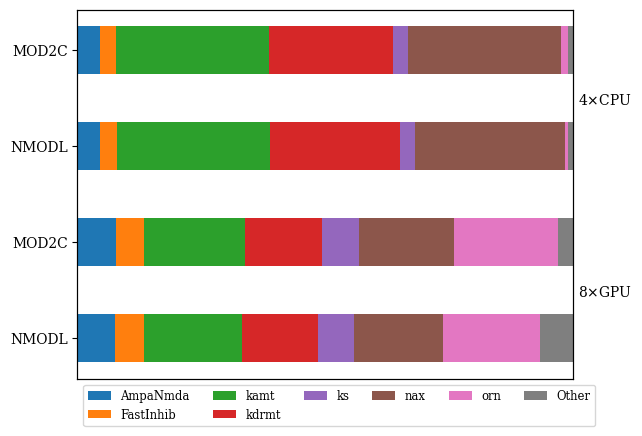

In [21]:
matplotlib.rc('text', usetex=False)
make_plot('olfactory-bulb-3d', 'main/simulation/timestep/state-update', assume_zero=True, threshold=1e-2)
matplotlib.rc('text', usetex=True)

Ignoring {'main/simulation/timestep/state-update/state-pas'} missing in ('cpu', 'nmodl-sympy') (ordering not checked!)
Ignoring {'main/simulation/timestep/state-update/state-pas'} missing in ('gpu-8gpus-accsync', 'nmodl-sympy') (ordering not checked!)
Suppressing main/simulation/timestep/state-update/state-pas
leftover 0.025941111438154807
leftover 0.02798287479077921
leftover 0.03883237527592964
leftover 0.053003160211701594


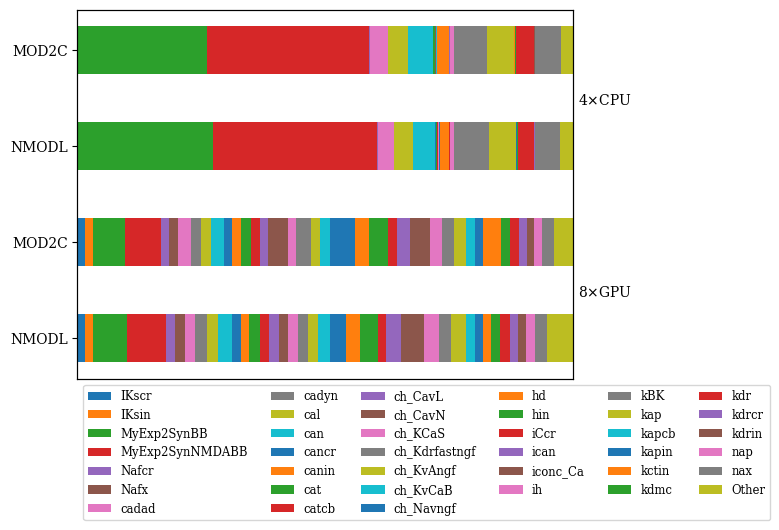

In [22]:
matplotlib.rc('text', usetex=False)
make_plot('netpyne-m1', 'main/simulation/timestep/state-update', assume_zero=True, threshold=1e-2)
matplotlib.rc('text', usetex=True)

leftover 0.0502264137478825
leftover 0.051224346853812164
leftover 0.16182134434826134
leftover 0.14049081879439573


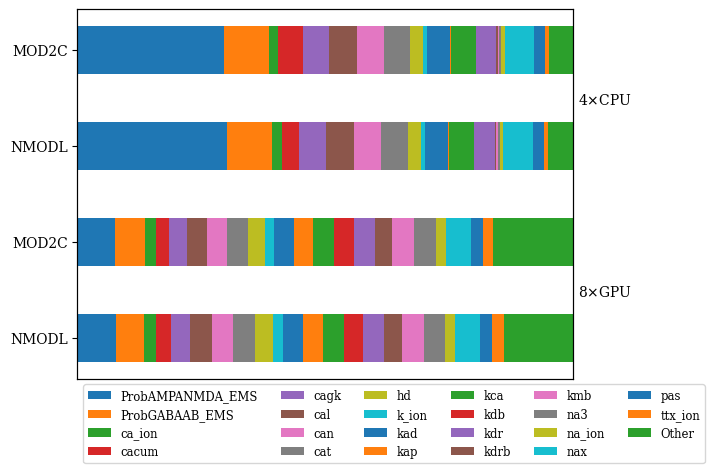

In [23]:
matplotlib.rc('text', usetex=False)
make_plot('hippocampus', 'main/simulation/timestep/setup-tree-matrix', threshold=2e-2)
matplotlib.rc('text', usetex=True)

leftover 0.2180533516839589
leftover 0.2195860057829685
leftover 0.23079952067131881
leftover 0.23526948905679146


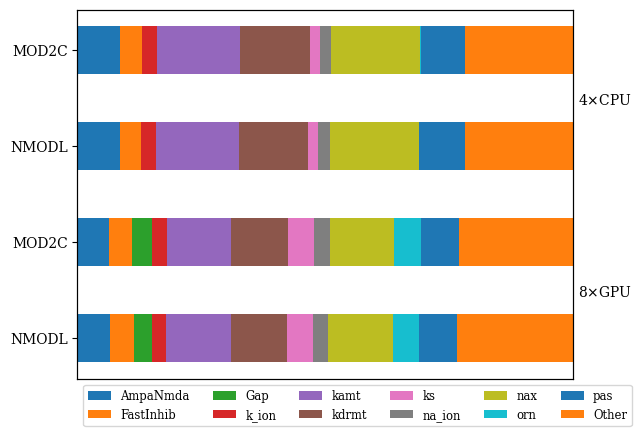

In [24]:
matplotlib.rc('text', usetex=False)
make_plot('olfactory-bulb-3d', 'main/simulation/timestep/setup-tree-matrix', threshold=2e-2)
matplotlib.rc('text', usetex=True)

Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.0318056175668302
leftover 0.03041255364831108
xpos: [0 1]
ypos: [0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
heights: [0.02172832 0.29117396]
starts: [0. 0.]
heights: [0.02676344 0.06340962]
starts: [0.02172832 0.29117396]
heights: [0.05485654 0.08731019]
starts: [0.04849176 0.35458358]
heights: [0.55788381 0.26203369]
starts: [0.10334829 0.44189378]
heights: [0.04545056 0.10917856]
starts: [0.66123211 0.70392747]
heights: [0.26151172 0.15648142]
starts: [0.70668266 0.81310602]
heights: [0.03180562 0.03041255]
starts: [0.96819438 0.96958745]


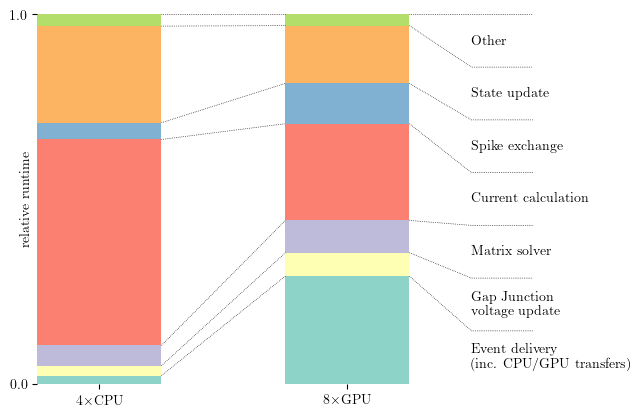

In [134]:
def make_plot_ng(model, prefix, axes=None, latexify=True, legend_axes=None, **kwargs):
    save_figure = False
    if axes is None:
        fix, axes = plt.subplots()
        save_figure = True
    plot_kwargs = {x: kwargs.pop(x) for x in ['title'] if x in kwargs}
    value_names, values, prefix = get_components_from_prefix(model, prefix, **kwargs)

    # Relies on modern Python's order-preserving dicts
    values = {k: values[k] for k in sorted(values.keys(), reverse=False)}
        
    # Helper to allow substitution of pretty LaTeX
    def latex(x):
        return pretty_latex.get(x, str(x)) if latexify else str(x)
    
    # Beautify the different categories (i.e. the names in the legend)
    value_names = [latex(x) for x in value_names]
    
    # Try and de-duplicate the configuration names a bit.
    # If the keys are [(A, X...), (A, Y...), (B, Z...)] then remove the first
    # elements and put a second y-axis on the RHS with only [A, B] and remove
    # the first elements from the LHS.
    if all([type(x) == tuple for x in values.keys()]):
        right_labels = [latex(x[0]) for x in values.keys()]
        left_labels  = [latex(x[1:] if len(x) > 2 else x[1]) for x in values.keys()]
    else:
        left_labels = [latex(x) for x in values.keys()]
        right_labels = None
    
    cmap = plt.get_cmap('Set3') # 'tab10' 'Paired' also works OK
    
    data = np.array(list(values.values()))
    data_cum = data.cumsum(axis=1)
    
    x_pos = np.arange(len(left_labels))
    y_pos = np.linspace(0,1,len(value_names)+1)
    y_pos_lbl = np.linspace((y_pos[0]+y_pos[1])/2,(y_pos[-1]+y_pos[-2])/2,len(value_names))
    print(f'xpos: {x_pos}')
    print(f"ypos: {y_pos}")
    for i, colname in enumerate(value_names):
        heights = data[:, i]
        starts = data_cum[:, i] - heights
        ends = data_cum[:, i]
        print(f'heights: {heights}')
        print(f'starts: {starts}')

        rects = axes.bar(x_pos, heights, bottom=starts, width=0.5,
                          label=colname, color=cmap.colors[i%len(cmap.colors)])
        # extra lines
        axes.plot(x_pos+[0.25,-0.25], starts, 'k:', linewidth=0.5)
        axes.plot([1.25, 1.5, 1.75], [starts[-1], y_pos[i], y_pos[i]], 'k:', linewidth=0.5)
        axes.text(1.5, y_pos_lbl[i], colname, verticalalignment='center')
    
    axes.plot(x_pos+[0.25,-0.25], ends, 'k:', linewidth=0.5)
    axes.plot([1.25, 1.5, 1.75], [ends[-1], y_pos[-1], y_pos[-1]], 'k:', linewidth=0.5)
    

    axes.set_yticks([0, 1])
    axes.set_yticklabels(['0.0', '1.0'])
    axes.set_ylabel('relative runtime')
    axes.yaxis.set_label_coords(-0.01, 0.5) 
    axes.set_xlim(-0.25,1.75)
    axes.set_ylim(-0.001, 1.0)

    # De-duplicate the RHS labels and compute average y positions for the
    # duplicate elements.

    last_count, rhs_positions, rhs_labels = 0, [], []
    for i, label in enumerate(right_labels):
        if len(rhs_labels) and label == rhs_labels[-1]:
            last_count += 1
            rhs_positions[-1] += i
        else:
            if len(rhs_labels):
                rhs_positions[-1] /= last_count
            last_count = 1
            rhs_positions.append(i)
            rhs_labels.append(label)
    rhs_positions[-1] /= last_count
    axes.set_xticks(rhs_positions)
    axes.set_xticklabels(rhs_labels)
    #axes.xaxis.set_tick_params(length=0) 
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)
    
    #if legend_axes is None:
    #    axes.legend(ncol=min(6, len(value_names)), bbox_to_anchor=(0, 0),
    #                loc='upper left', fontsize='small')
    #else:
    #    h,l = axes.get_legend_handles_labels()
    #    legend_axes.legend(h,l, borderaxespad=0, ncol=2, loc='upper left', fontsize='small', frameon=False)
    #    legend_axes.axis("off") 
    

    
    if save_figure:
        filename = model + '-' + prefix[5:].replace('/', '-')
        if filename[-1] == '-': filename = filename[:-1]
        filename += '.pdf'
        plt.savefig(os.path.join(repo_prefix, filename), bbox_inches='tight')
        
make_plot_ng('olfactory-bulb-3d', 'main/simulation/timestep', threshold=3e-2, translators={'nmodl-sympy'})


In [25]:
# Commented out because of the following:
# Ignoring {'main/simulation/timestep/setup-tree-matrix/cur-cadyn', 'main/simulation/timestep/setup-tree-matrix/cur-catcb', 'main/simulation/timestep/setup-tree-matrix/cur-iconc_Ca', 'main/simulation/timestep/setup-tree-matrix/cur-cadad'} missing in ('cpu', 'nmodl-sympy') (ordering not checked!)
# Ignoring {'main/simulation/timestep/setup-tree-matrix/cur-cadyn', 'main/simulation/timestep/setup-tree-matrix/cur-catcb', 'main/simulation/timestep/setup-tree-matrix/cur-iconc_Ca', 'main/simulation/timestep/setup-tree-matrix/cur-cadad'} missing in ('gpu-8gpus-accsync', 'nmodl-sympy') (ordering not checked!)
# matplotlib.rc('text', usetex=False)
# make_plot('netpyne-m1', 'main/simulation/timestep/setup-tree-matrix', threshold=2e-2)
# matplotlib.rc('text', usetex=True)

data_to_plot
[[ 2.9607376  20.93751992 41.77871533]
 [ 3.69690968 26.06544613 51.9731668 ]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.010313771277681294
leftover 0.03192226238867857


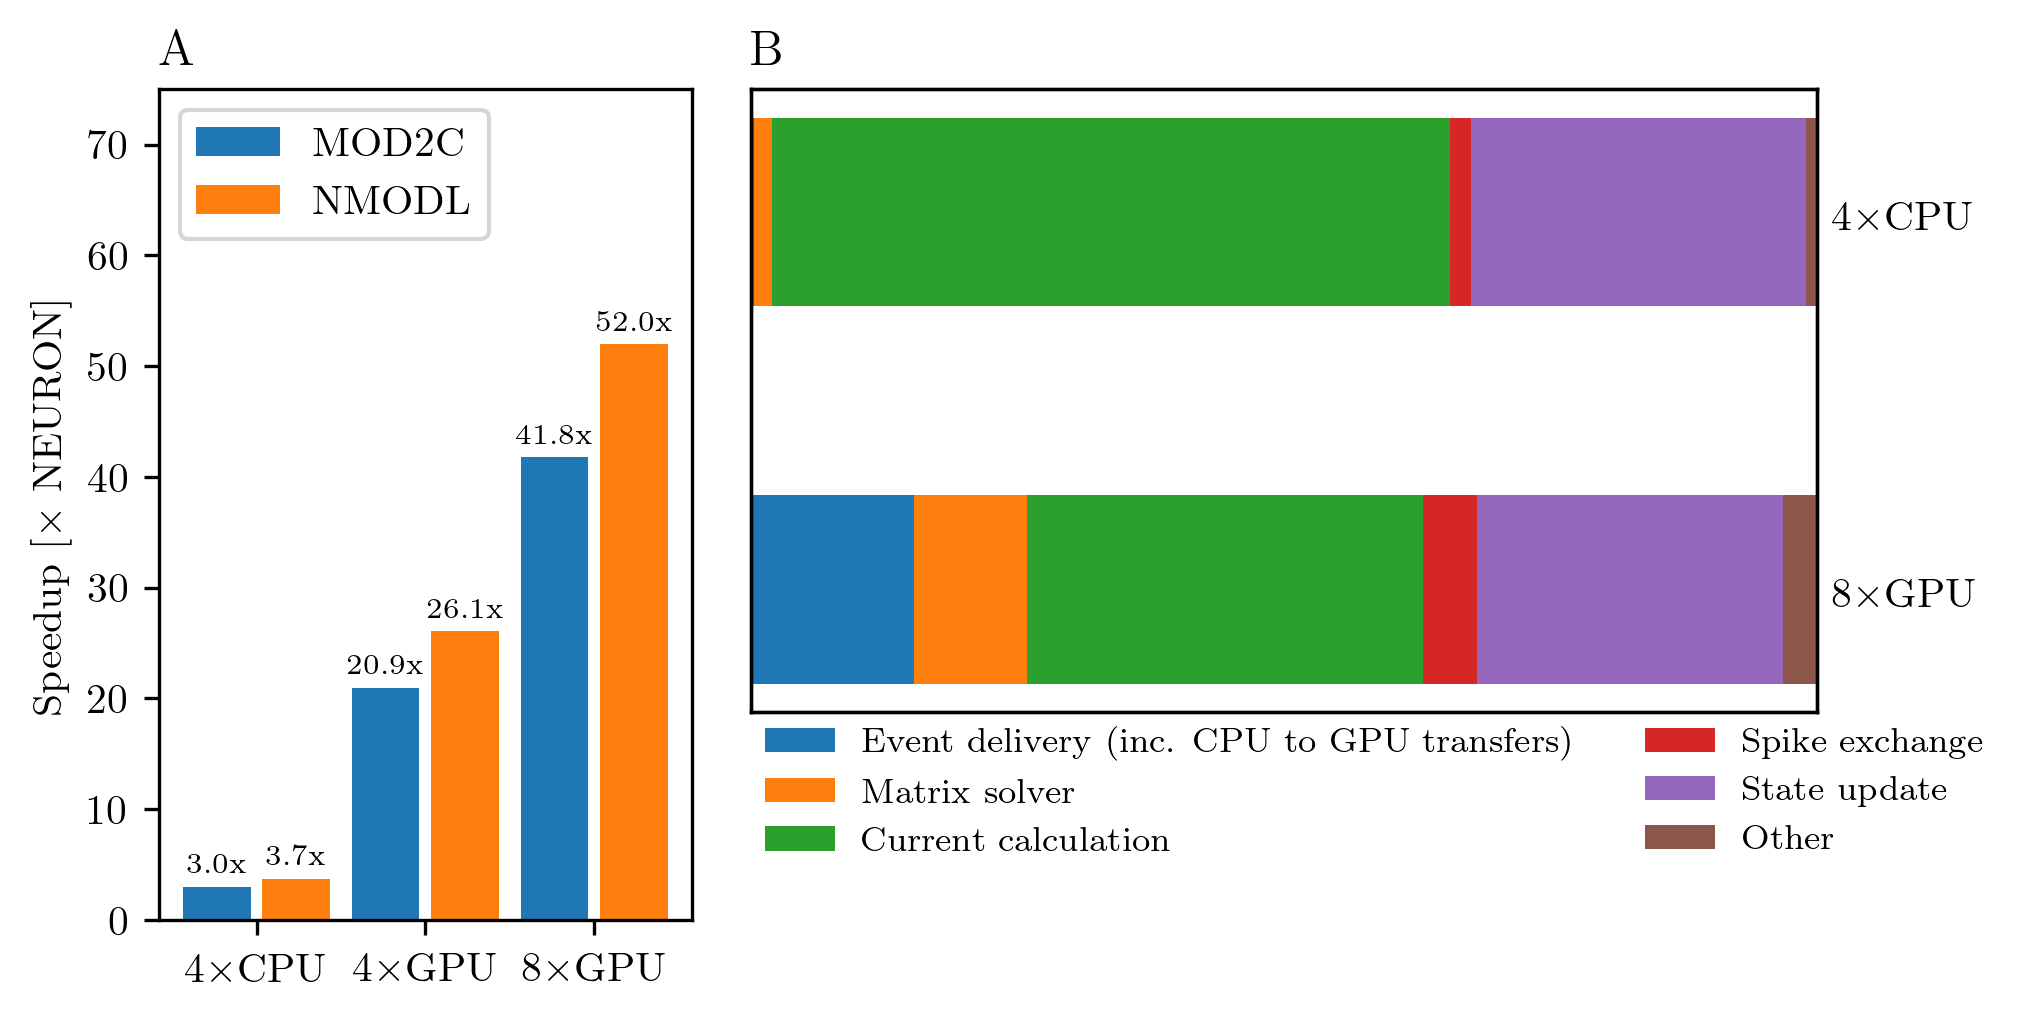

In [112]:
def make_summary_plot(model, rhs_kwargs={}):
    model_figsize = (fig_width, fig_width/2)
    fig, axs = plt.subplots(2, 2, dpi=300,
                                  figsize=model_figsize,
                                  tight_layout=True,
                                  gridspec_kw={
                                      # Minimize space above legend.
                                      'hspace': 0,
                                      'width_ratios': [1, 2],
                                      'height_ratios': [3, 1],
                                  })
    # Merge the upper/lower axes in the first column
    gs = axs[0, 0].get_gridspec()
    for ax in axs[:,0]: ax.remove()
    ax1 = fig.add_subplot(gs[:,0])
    # Upper right
    ax2 = axs[0,1]
    # Lower right
    ax3 = axs[1,1]
    # Draw the speedup bar chart on the left subplot
    make_overall_timing_plot(model, axes=ax1, speedup=True, width=0.4, sep=0.07)
    ax1.set_title("A", loc="left", fontdict={'weight': 'bold'})
    make_plot(model, 'main/simulation/timestep', axes=ax2, latexify=True, legend_axes=ax3, threshold=5e-2, **rhs_kwargs)
    ax2.set_title("B", loc="left", fontdict={'weight': 'bold'})
    fig.savefig(model + '-speed-up-and-break-down.pdf', bbox_inches='tight')

make_summary_plot('hippocampus', rhs_kwargs={'translators': {'nmodl-sympy'}})

data_to_plot
[[ 3.47209919 21.40746504 30.36915617]
 [ 3.54405252 21.23664248 29.95734299]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.0318056175668302
leftover 0.03041255364831108


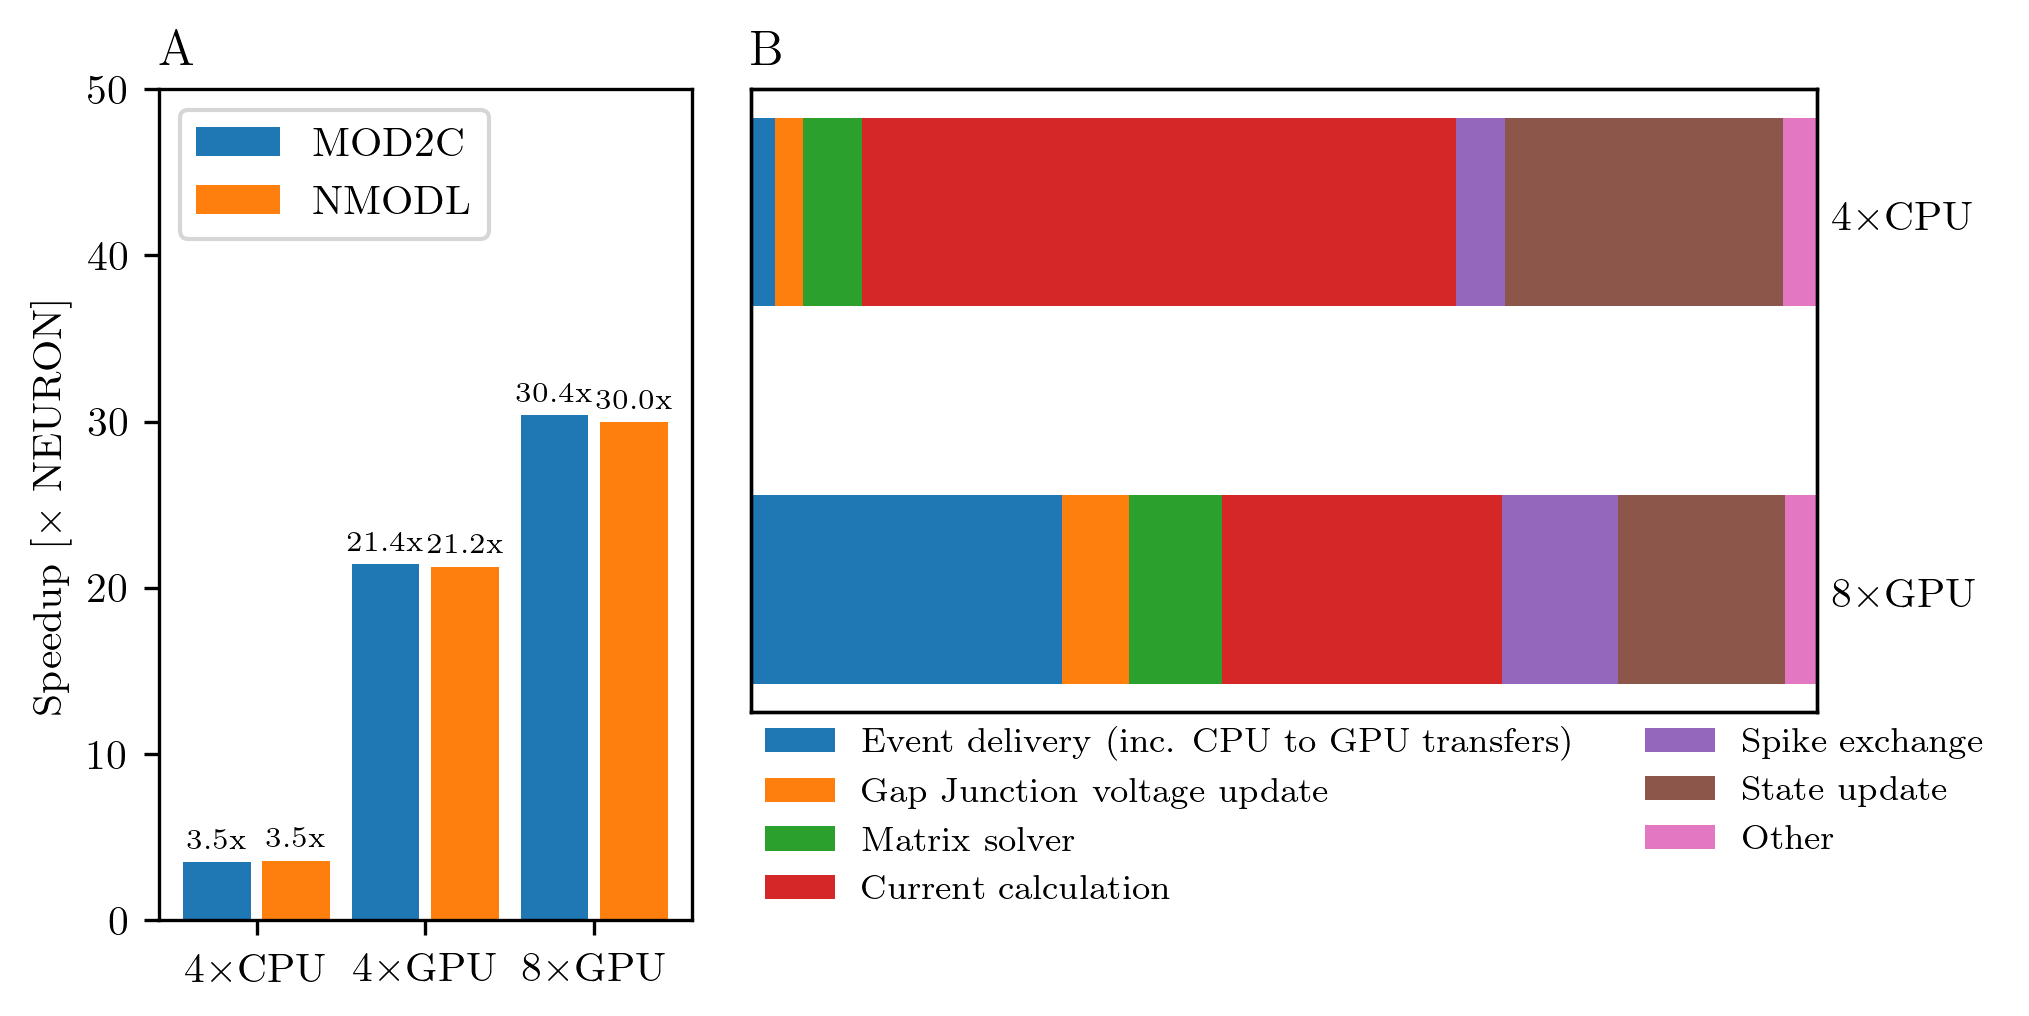

In [27]:
make_summary_plot('olfactory-bulb-3d', rhs_kwargs={'translators': {'nmodl-sympy'}})

data_to_plot
[[ 3.7089052  24.46992747 37.03630488]
 [ 4.04839654 26.33725172 39.18717737]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
Suppressing main/simulation/timestep/matrix-solver
leftover 0.01073348877619651
leftover 0.011742870391181826
leftover 0.05997752618552399
leftover 0.061725303218446825


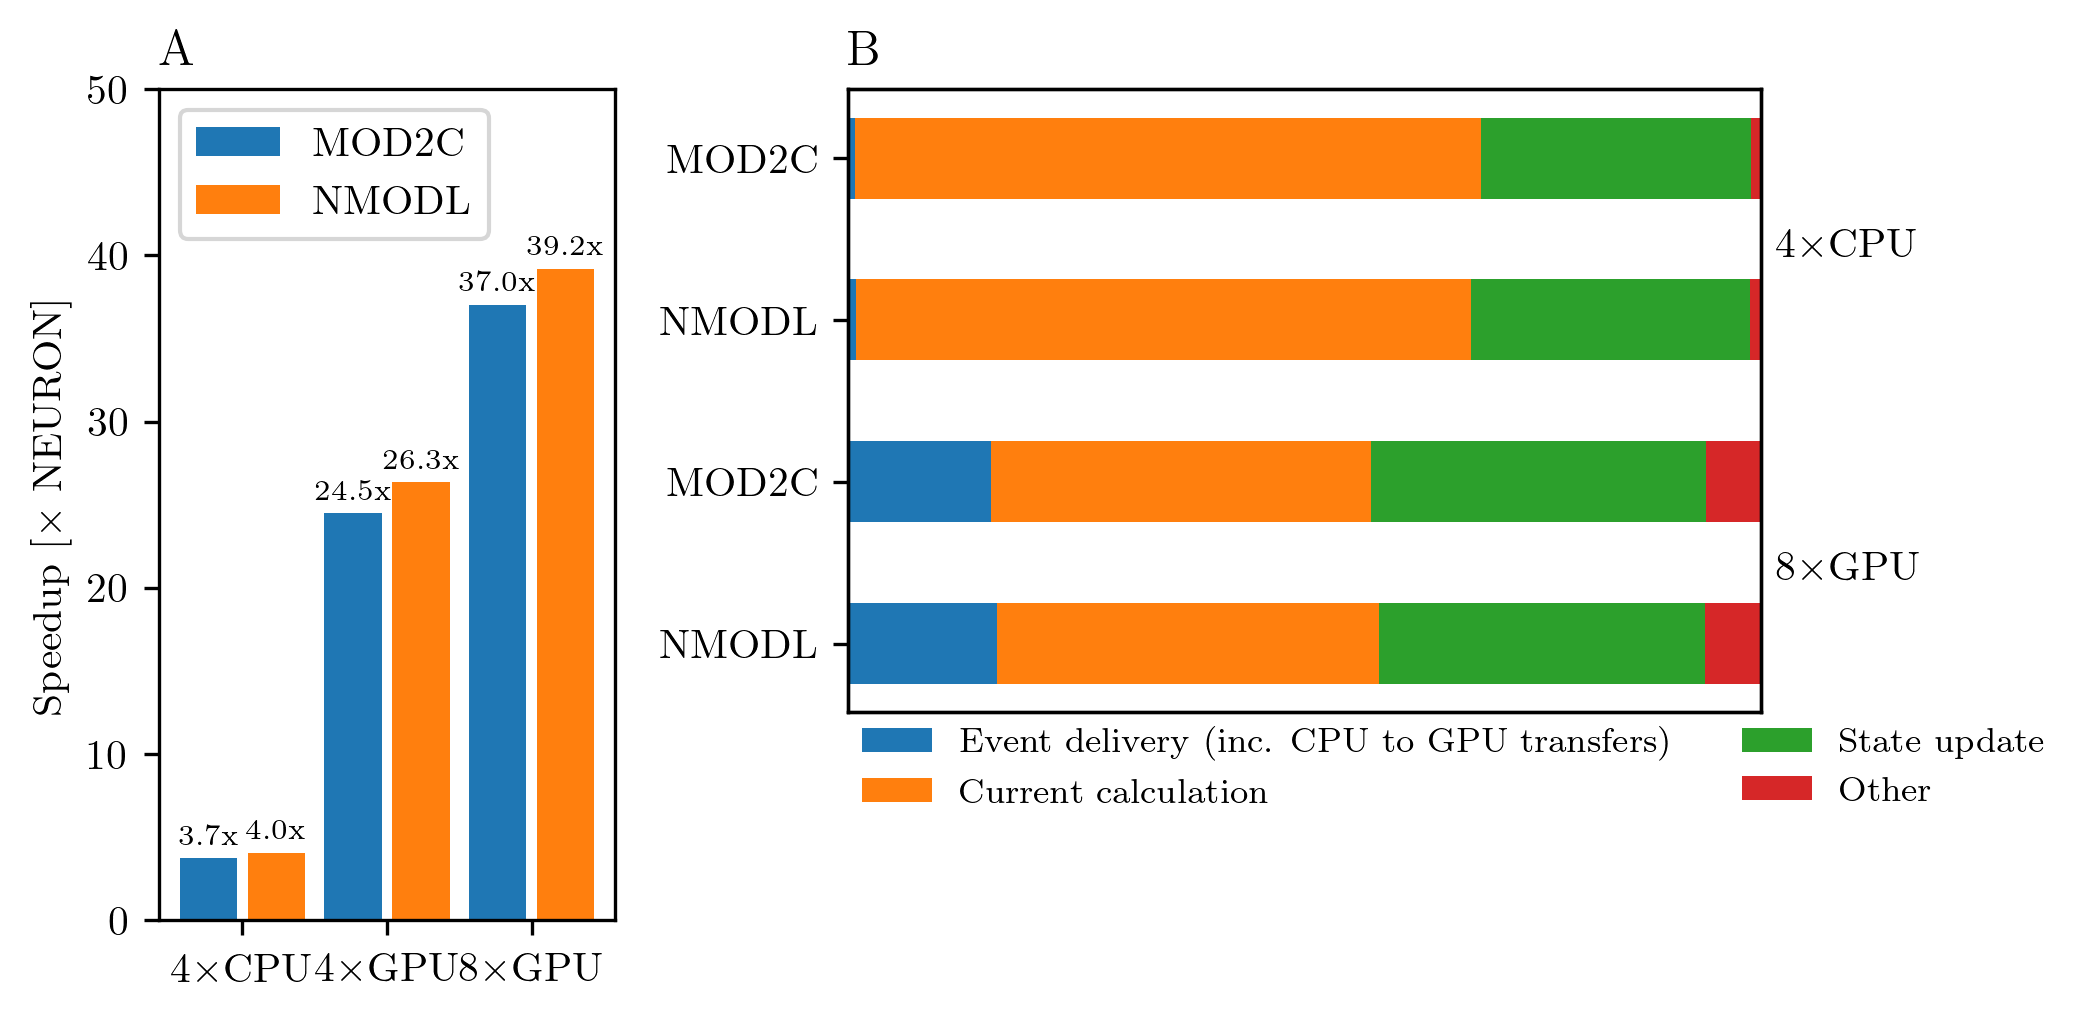

In [28]:
make_summary_plot('netpyne-m1')

data_to_plot
[[ 3.42324219 20.47263034 30.24806988]
 [ 3.64151082 20.75771786 30.21736138]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
Suppressing main/simulation/timestep/matrix-solver
leftover 0.008981479595621455
leftover 0.010336471057377894
leftover 0.05264384217687301
leftover 0.05320950112566991


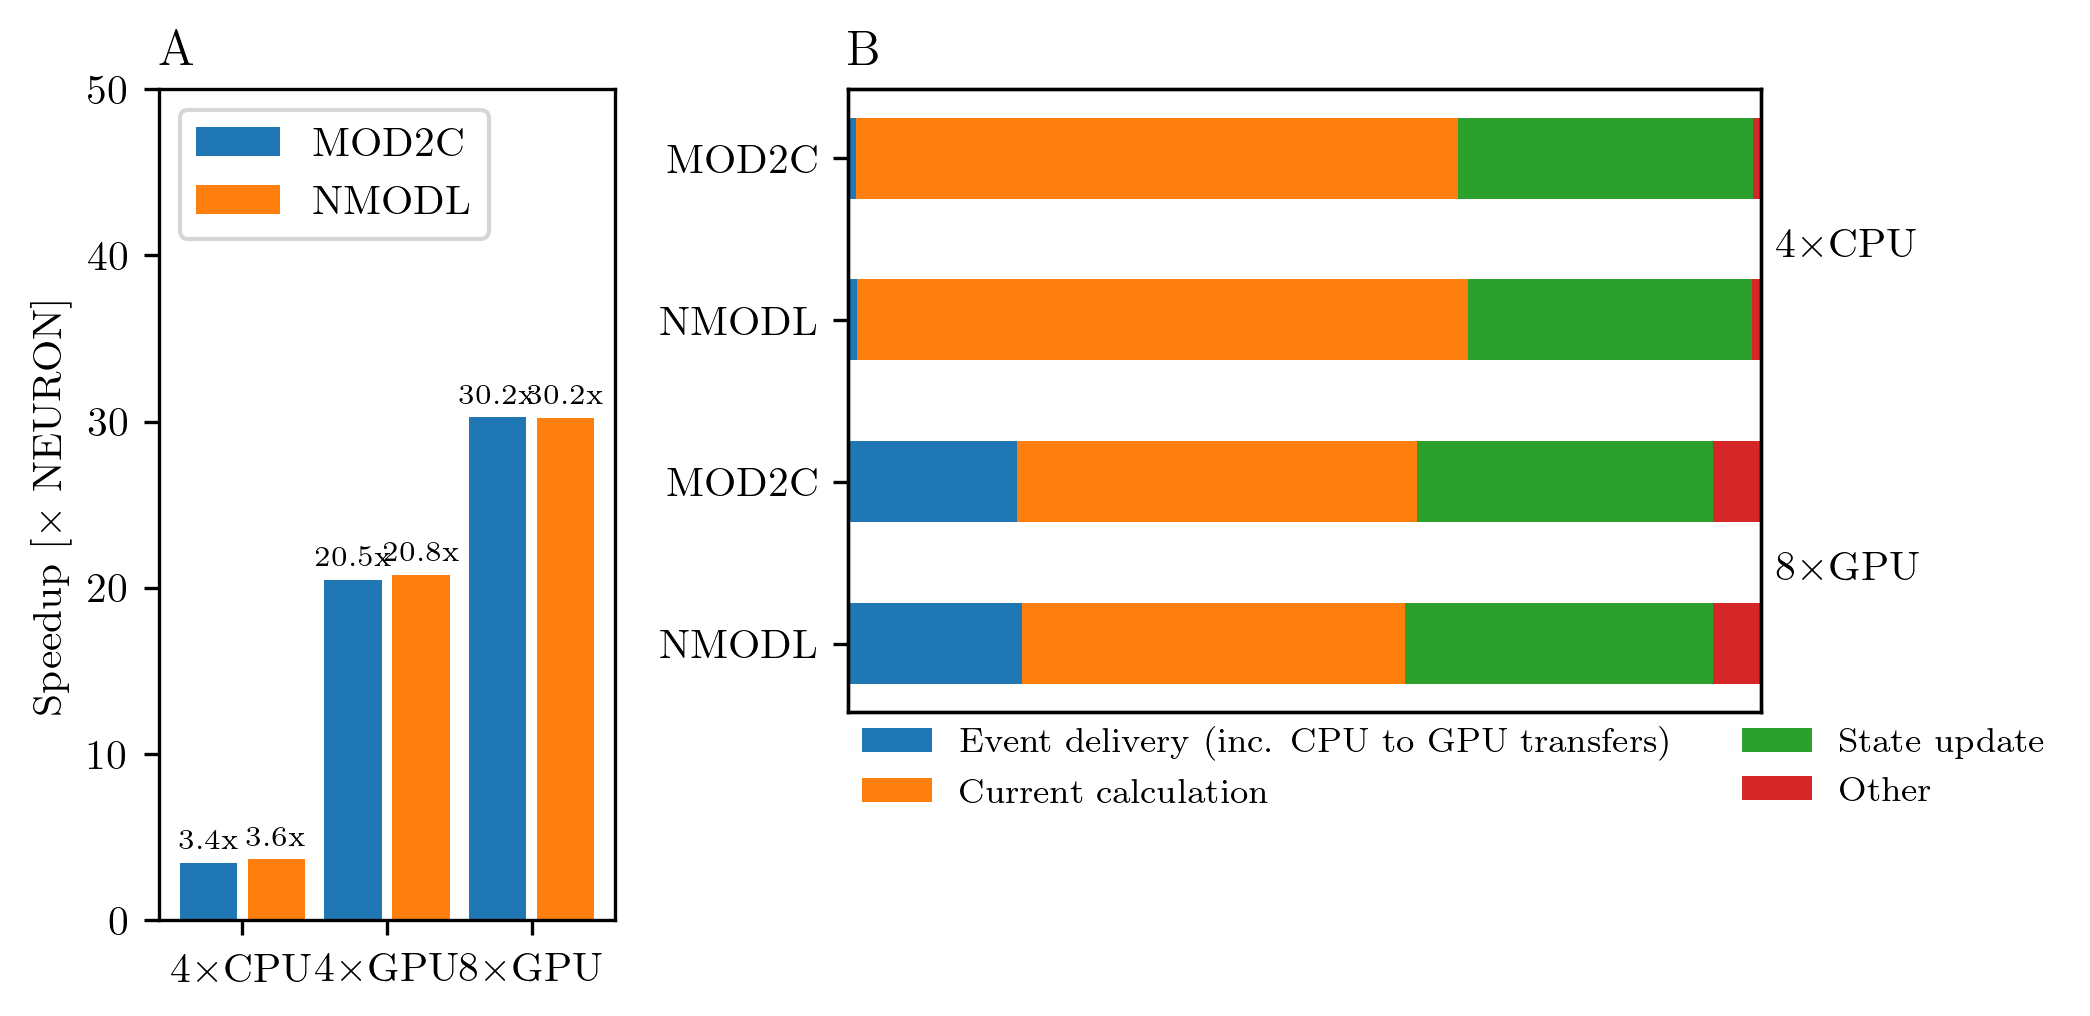

In [29]:
make_summary_plot('netpyne-m1-gcp')

data_to_plot
[[ 3.7089052  24.46992747 37.03630488]
 [ 4.04839654 26.33725172 39.18717737]]
data_to_plot
[[ 3.42324219 20.47263034 30.24806988]
 [ 3.64151082 20.75771786 30.21736138]]


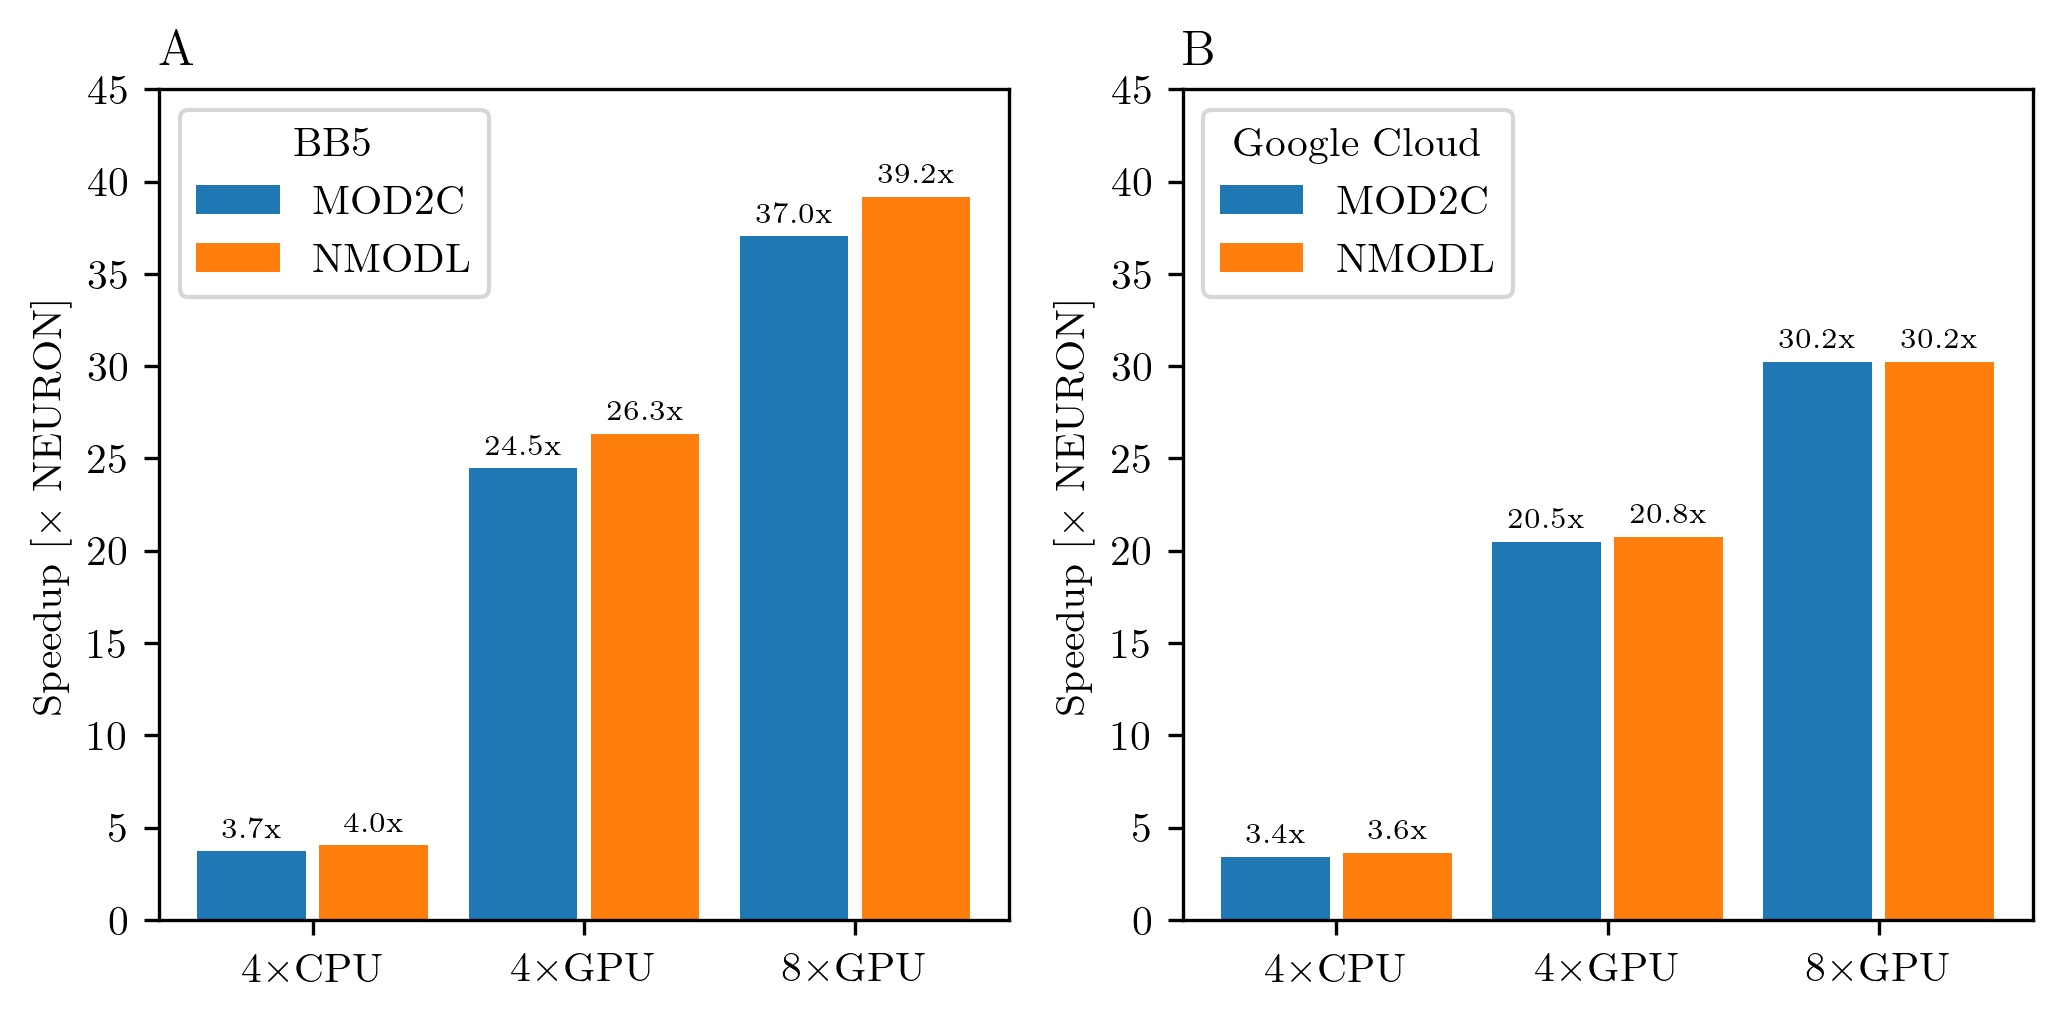

In [113]:
def make_netpyne_summary_plot():
    fig, axs = plt.subplots(2, 2, dpi=300,
                                  figsize=(fig_width, fig_width/2),
                                  tight_layout=True,
                                  gridspec_kw={
                                      # Minimize space above legend.
                                      'hspace': 0,
                                      'width_ratios': [1, 1],
                                      'height_ratios': [3, 3],
                                  })
    # Merge the upper/lower axes in the first column
    gs = axs[0, 0].get_gridspec()
    for ax in axs[:,0]: ax.remove()
    ax1 = fig.add_subplot(gs[:,0])
    # Upper right
    gs = axs[0, 1].get_gridspec()
    for ax in axs[:,1]: ax.remove()
    ax2 = fig.add_subplot(gs[:,1])
    # Lower right
    ax3 = axs[1,1]
    # Draw the speedup bar chart on the left subplot
    y_lim=45
    make_overall_timing_plot("netpyne-m1", axes=ax1, speedup=True, y_lim=y_lim, axes_title="BB5", width=0.4, sep=0.05)
    ax1.set_title("A", loc="left", fontdict={'weight': 'bold'})
    make_overall_timing_plot("netpyne-m1-gcp", axes=ax2, speedup=True, y_lim=y_lim, axes_title="Google Cloud", width=0.4, sep=0.05)
    ax2.set_title("B", loc="left", fontdict={'weight': 'bold'})
    fig.savefig('netpyne-summary.pdf', bbox_inches='tight')

make_netpyne_summary_plot()

data_to_plot
[[ 2.9607376  20.93751992 41.77871533]
 [ 3.69690968 26.06544613 51.9731668 ]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.010313771277681294
leftover 0.03192226238867857
xpos: [0 1]
ypos: [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
heights: [0.00244199 0.15232807]
starts: [0. 0.]
heights: [0.01653733 0.10582347]
starts: [0.00244199 0.15232807]
heights: [0.63629937 0.37152402]
starts: [0.01897932 0.25815154]
heights: [0.01955784 0.05082871]
starts: [0.65527869 0.62967556]
heights: [0.31484971 0.28757347]
starts: [0.67483652 0.68050427]
heights: [0.01031377 0.03192226]
starts: [0.98968623 0.96807774]
data_to_plot
[[ 3.47209919 21.40746504 30.36915617]
 [ 3.54405252 21.23664248 29.95734299]]
Suppressing main/simulation/timestep/update
Suppressing main/simulation/timestep/second-order-cur
leftover 0.0318056175668302
leftover 0.03041255364831108
xpos: [0 1]
ypos: [0.         0.

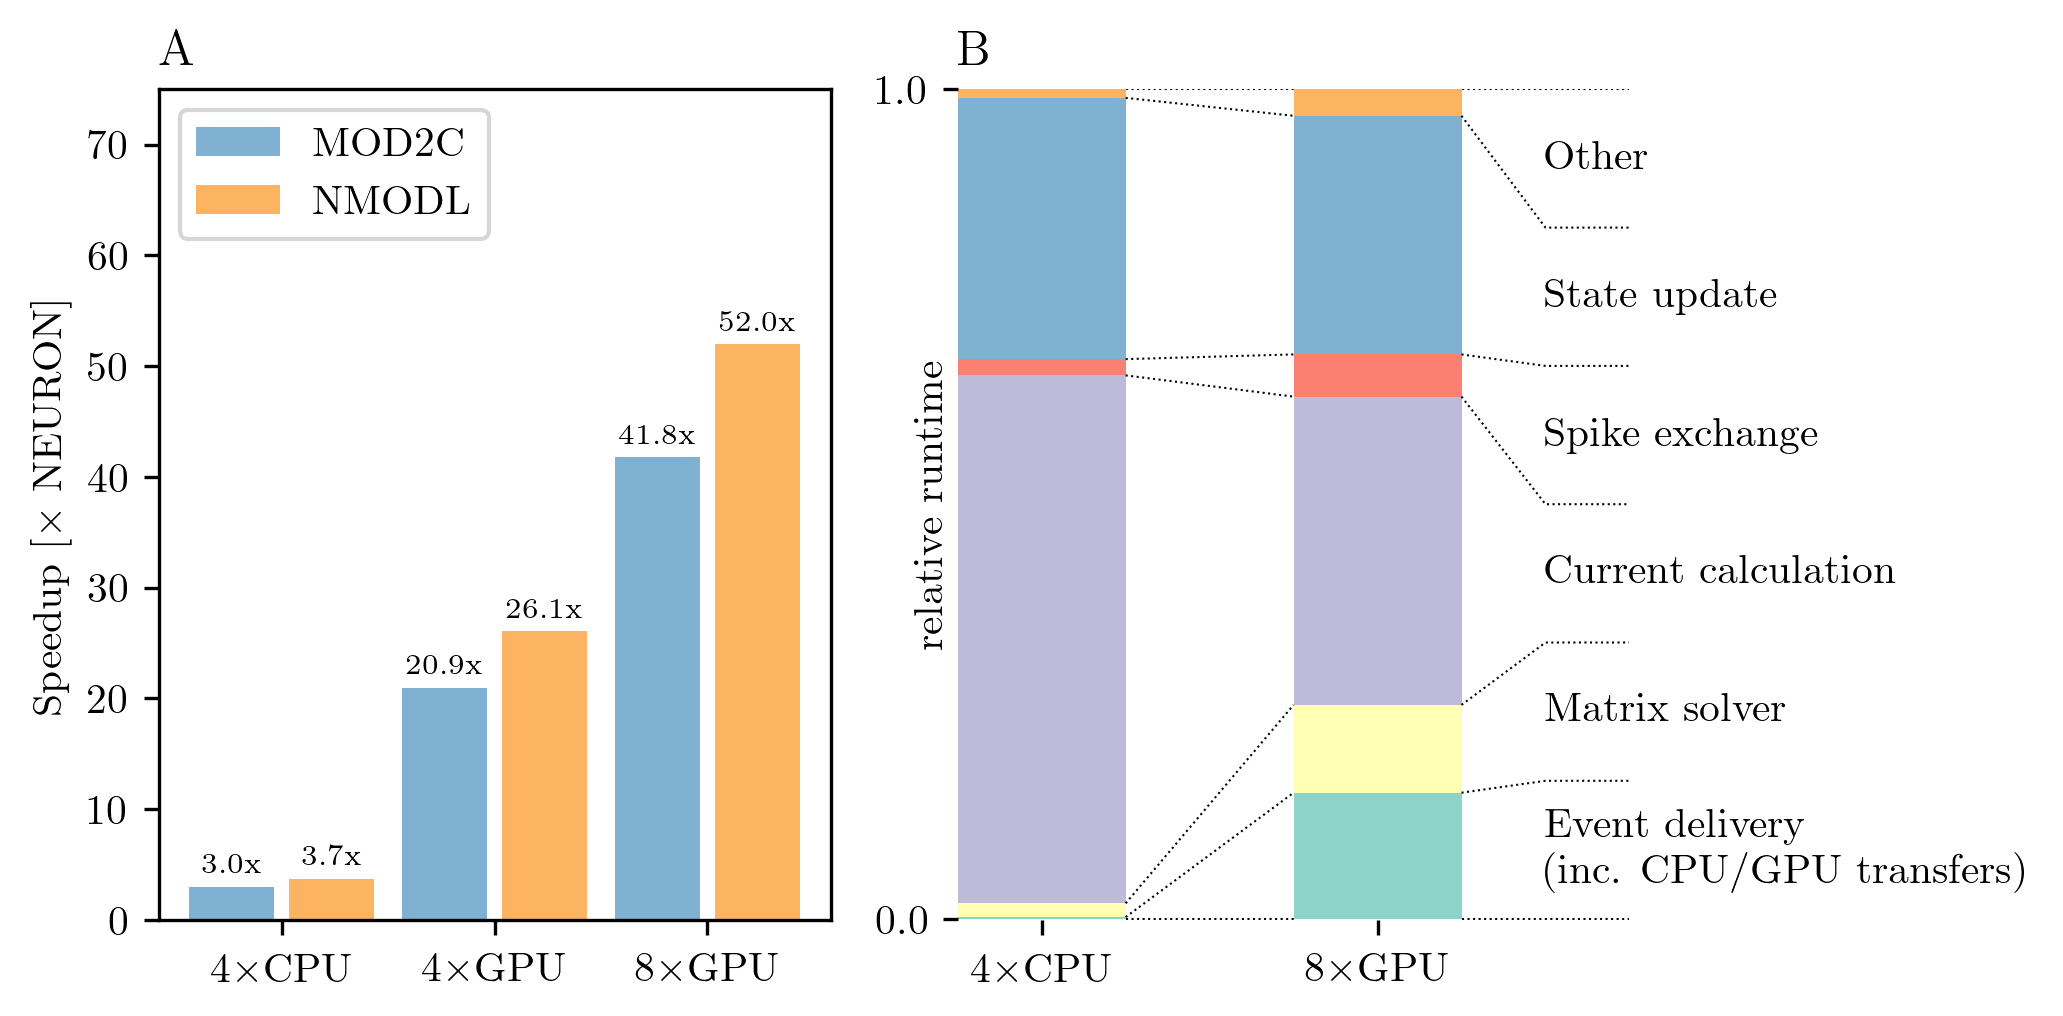

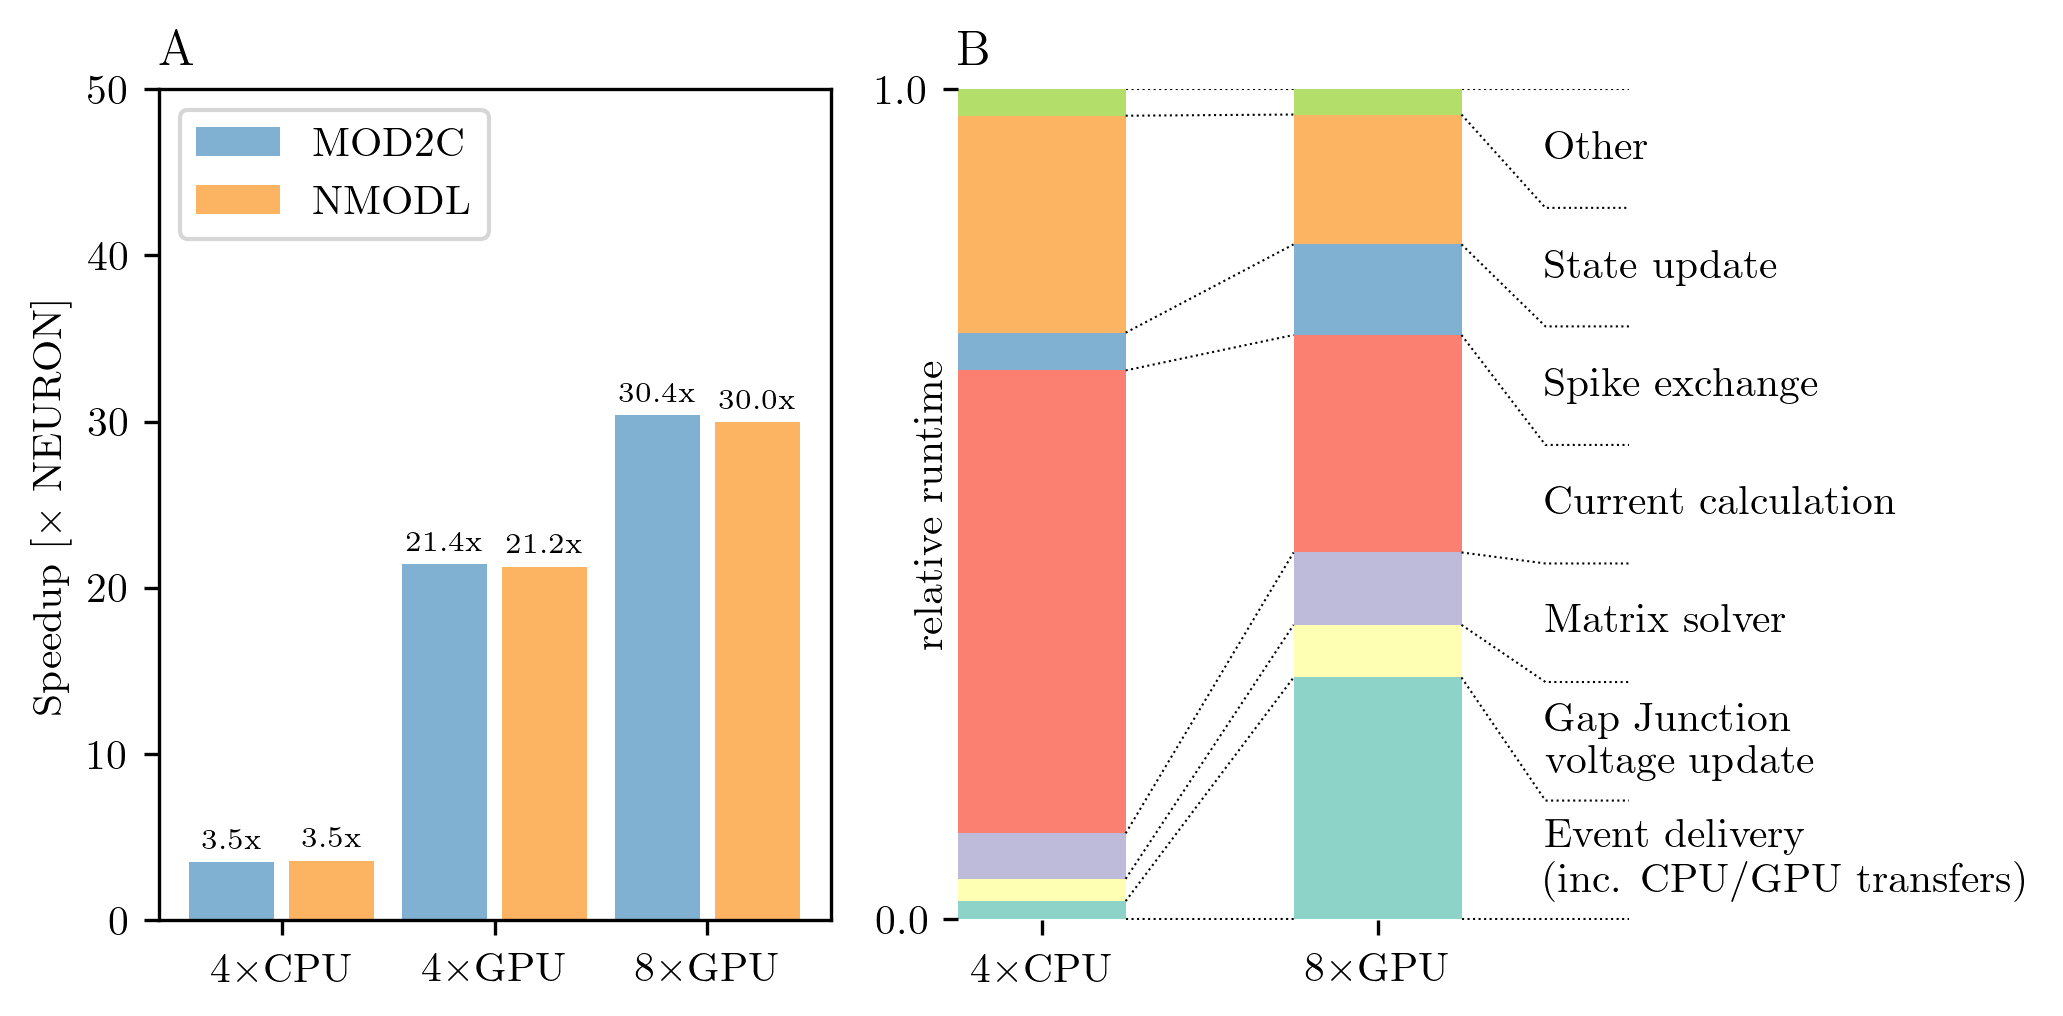

In [141]:
def make_summary_plot_ng(model, rhs_kwargs={}):
    model_figsize = (fig_width, fig_width/2)
    fig, axs = plt.subplots(1, 2, dpi=300,
                                  figsize=model_figsize,
                                  tight_layout=True)

    # Draw the speedup bar chart on the left subplot
    make_overall_timing_plot(model, axes=axs[0], speedup=True, width=0.4, sep=0.07)
    axs[0].set_title("A", loc="left", fontdict={'weight': 'bold'})
    make_plot_ng(model, 'main/simulation/timestep', axes=axs[1], latexify=True, threshold=5e-2, **rhs_kwargs)
    axs[1].set_title("B", loc="left", fontdict={'weight': 'bold'})
    fig.savefig(model + '-speed-up-and-break-down.pdf', bbox_inches='tight')

make_summary_plot_ng('hippocampus', rhs_kwargs={'translators': {'nmodl-sympy'}})
make_summary_plot_ng('olfactory-bulb-3d', rhs_kwargs={'translators': {'nmodl-sympy'}})